In [2]:
from __future__ import print_function
import os.path
import pandas as pd
import gzip
import sys
import numpy as np

sys.path.insert(0, '..')

from src.CCLE_postp_function import *
from JKBio import Datanalytics as da 
from JKBio import TerraFunction as terra
from JKBio import Helper as h
from JKBio.helper.google_sheet import GSheet
from gsheets import Sheets
from taigapy import TaigaClient
import dalmatian as dm

from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt
from bokeh.plotting import *
from bokeh.models import HoverTool
from collections import OrderedDict
from IPython.display import Image,display
import seaborn as sns

from biomart import BiomartServer
import io

%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
tc = TaigaClient()
output_notebook()

my_id = '~/.client_secret.json'
mystorage_id = "~/.storage.json"
sheets = Sheets.from_files(my_id, mystorage_id)
replace = {'T': 'Tumor', 'N': 'Normal', 'm': 'Unknown', 'L': 'Unknown'}

you need to have JKBio in your path:
e.g. have installed JKBio in the same folder as ccle_processing


InvalidClientSecretsError: ('Error opening file', '/home/jeremie/.client_secret.json', 'No such file or directory', 2)

In [ ]:
samplesetname="20Q4"
prevname="20Q3"
prevversion=14 #TOTAL
prevprevname = "20Q2"
prevprevversion=22 #INTERNAL
virtual_public='public-20q3-3d35'
virtual_dmc='dmc-20q3-033d'
virtual_internal='internal-20q3-00d0'

workspace2="broad-firecloud-ccle/CCLE_DepMap_RNAseq"
workspace4="broad-genomics-delivery/Cancer_Cell_Line_Factory_CCLF_RNAseq"
workspace5="nci-mimoun-bi-org/CCLF_RNA_2_0"

workspace3="broad-genomics-delivery/CCLE_DepMap_RNAseq"
workspace1="broad-genomics-delivery/Getz_IBM_CellLines_RNASeqData"

workspace6="terra-broad-cancer-prod/CCLE_DepMap_RNAseq"
workspace7="terra-broad-cancer-prod/Getz_IBM_CellLines_RNASeqData"

refworkspace="broad-firecloud-ccle/DepMap_hg38_RNAseq"
source1="ibm"
source2="ccle"
source3="ccle"
source4="cclf"
source5="cclf"
source6="ccle"
source7="ibm"
release = samplesetname

refsheet_url = "https://docs.google.com/spreadsheets/d/1XkZypRuOEXzNLxVk9EOHeWRE98Z8_DBvL4PovyM01FE"
privacy_release_url = "https://docs.google.com/spreadsheets/d/115TUgA1t_mD32SnWAGpW9OKmJ2W5WYAOs3SuSdedpX4"

gencode = 'ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_35/gencode.v35.annotation.gff3.gz'

In [3]:
%%R
genome_version <- 'hg38'
release <- '20Q2'
hg38_cyto_band_reference <- '../JKBio/data/hg38_cytoband.gz'

# Generate sample set from new samples

In [4]:
extract_to_change = {'from_arxspan_id': 'participant',
}

In [5]:
wm1 = dm.WorkspaceManager(workspace1)
#wm2 = dm.WorkspaceManager(workspace2)
#wm3 = dm.WorkspaceManager(workspace3)
#wm4 = dm.WorkspaceManager(workspace4)
#wm5 = dm.WorkspaceManager(workspace5)
wm6 = dm.WorkspaceManager(workspace6)
wm7 = dm.WorkspaceManager(workspace7)
refwm = dm.WorkspaceManager(refworkspace).disable_hound()

/home/jeremie/miniconda3/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/home/jeremie/miniconda3/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about servic

In [6]:
ccle_refsamples = sheets.get(refsheet_url).sheets[0].to_frame().set_index('cds_sample_id')

In [19]:
# we will be missing "primary disease","sm_id", "cellosaurus_id", "gender, "age", "primary_site", "primary_disease", "subtype", "subsubtype", "origin", "comments"
#when SMid: match==
samples, pairs, noarxspan = GetNewCellLinesFromWorkspaces(refworkspace, stype='rna', refurl=refsheet_url, wmfroms = [workspace1, workspace6, workspace7], sources=[source1,source6, source7], match=['ACH-','CDS-'], participantslicepos=10, accept_unknowntypes=True, extract=extract_to_change, recomputedate=True)

refsamples is overrided by a refurl
Getting sample infos...

The shape of the sample tsv from <dalmatian.wmanager.WorkspaceManager broad-genomics-delivery/Getz_IBM_CellLines_RNASeqData>: (213, 242)
Identifying any true duplicates by checking file hashes (this runs for each data source)...
This step can take a while as we need to use gsutil to check the size of each potential duplicate...
listing files in gs
These 12 bam file path do not exist: {'gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/Getz_IBM_DMX_CellLines_10samples_Truseq_100M_12082018/RP-1420/RNA/SKGII/v1/SKGII.bam', 'gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/Getz_IBM_DMX_CellLines_10samples_Truseq_100M_12082018/RP-1420/RNA/HT144SKINFV3/v1/HT144SKINFV3.bam', 'gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/Getz_IBM_CellLines_RNASeqData_19samples_02012018/G41716/NA/IA-LM/v5/IA-LM.bam', 'gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/Getz_IBM_DMX_CellLines_10samples_Truseq_100M_12082018/RP-1420/RNA/SNU1544/v1/SNU1544.bam', 'gs://fc


The shape of the sample tsv from <dalmatian.wmanager.WorkspaceManager terra-broad-cancer-prod/CCLE_DepMap_RNAseq>: (135, 233)
Identifying any true duplicates by checking file hashes (this runs for each data source)...
This step can take a while as we need to use gsutil to check the size of each potential duplicate...
listing files in gs
These 11 bam file path do not exist: {'gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/CCLE_DepMap_RNAseq_July_Dec_2018_RP_1420/G136933/NA/TTC442_1/v2/TTC442_1.bam', 'gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/CCLE_DepMap_RNAseq_July_Dec_2018_RP_1420/G136933/NA/Rh36_1/v2/Rh36_1.bam', 'gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/CCLE_DepMap_RNAseq_July_Dec_2018_RP_1420/G136933/NA/RD_P3F__9_1/v2/RD_P3F__9_1.bam', 'gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/CCLE_DepMap_RNAseq_July_Dec_2018_RP_1420/G136933/NA/RH41_1/v2/RH41_1.bam', 'gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/CCLE_DepMap_RNAseq_July_Dec_2018_RP_1420/G136933/NA/SCMCRM2_1/v2/SCMCRM2_1.bam


The shape of the sample tsv from <dalmatian.wmanager.WorkspaceManager terra-broad-cancer-prod/Getz_IBM_CellLines_RNASeqData>: (221, 243)
Identifying any true duplicates by checking file hashes (this runs for each data source)...
This step can take a while as we need to use gsutil to check the size of each potential duplicate...
listing files in gs
These 12 bam file path do not exist: {'gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/Getz_IBM_DMX_CellLines_10samples_Truseq_100M_12082018/RP-1420/RNA/UHO1/v1/UHO1.bam', 'gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/Getz_IBM_DMX_CellLines_10samples_Truseq_100M_12082018/RP-1420/RNA/SNU1544/v1/SNU1544.bam', 'gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/Getz_IBM_DMX_CellLines_10samples_Truseq_100M_12082018/RP-1420/RNA/HT144SKINFV1/v1/HT144SKINFV1.bam', 'gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/Getz_IBM_DMX_CellLines_10samples_Truseq_100M_12082018/RP-1420/RNA/KML1/v1/KML1.bam', 'gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/Getz_IBM_CellLines_

In [20]:
noarxspan

,internal_bam_filepath,internal_bai_filepath,stripped_cell_line_name,arxspan_id,sequencing_date,participant_id,crc32c_hash,size
sample_id,,,,,,,,
CDS-7m76QB,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,HCC827 GR5,HCC827 GR5,0,PT-mPUUHy23,x5H8hg==,6906126261
CDS-Tq6E11,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,A431_1,A431,0,PT-BsxHzoSH,87APmw==,9277895578
CDS-fD2Q8T,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,C10_1,C10,0,PT-EdPeDmkh,8P2q8Q==,9058548453
CDS-Bmkm6M,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,C125PM_1,C125PM,0,PT-QrTxNPxv,ZF/yRw==,9560411859
CDS-XsgSOR,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,C75_1,C75,0,PT-1eHQBQaG,j7GfJg==,11703692610
...,...,...,...,...,...,...,...,...
CDS-FRZv94,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,Becker,Becker,737211,PT-Kvjxw944,eyPG2g==,4212562857
CDS-bmH4HU,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,CHL-1,HMCB_CHL-1,737396,PT-k6mAFpIx,6ClPGQ==,11982568232
CDS-1VXzut,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,KCI-MOH1,HPAC_KCI-MOH1,737162,PT-hviHFK42,BqmJpw==,6985383534


In [21]:
noarxspan.to_csv('temp/noarxspan_rna_'+release+'.csv')

In [27]:
noarxspan.arxspan_id = [ccle_refsamples[ccle_refsamples.stripped_cell_line_name==i].arxspan_id[0] if i in ccle_refsamples.stripped_cell_line_name.tolist() else 0 for i in noarxspan.arxspan_id]
a = [ccle_refsamples[ccle_refsamples.stripped_cell_line_name==i].arxspan_id[0] if i in ccle_refsamples.stripped_cell_line_name.tolist() else 0 for i in noarxspan.stripped_cell_line_name] 
noarxspan.arxspan_id = [i if i!=0 else a[e] for e,i in enumerate(noarxspan.arxspan_id)]

In [46]:
depmap_pv = depmap_pv.drop(depmap_pv.iloc[:2].index)

In [38]:
depmap_pv = sheets.get("https://docs.google.com/spreadsheets/d/1uqCOos-T9EMQU7y2ZUw4Nm84opU5fIT1y7jet1vnScE").sheets[0].to_frame(header=3)

HttpError: <HttpError 429 when requesting https://sheets.googleapis.com/v4/spreadsheets/1uqCOos-T9EMQU7y2ZUw4Nm84opU5fIT1y7jet1vnScE?alt=json returned "Resource has been exhausted (e.g. check quota).">

In [53]:
for k,val in noarxspan[noarxspan.arxspan_id==0].iterrows():
    val = ''.join(''.join(''.join(val.stripped_cell_line_name.split('-')).split('_')[:-1]).split('.')).upper()
    a = depmap_pv[depmap_pv.CCLE_name.str.contains(val) | depmap_pv['Stripped Cell Line Name'].str.contains(val) | depmap_pv.Aliases.str.contains(val)] 
    if len(a)>0:
        noarxspan.loc[k,'arxspan_id'] = a.DepMap_ID[0]

In [54]:
noarxspan    

,internal_bam_filepath,internal_bai_filepath,stripped_cell_line_name,arxspan_id,sequencing_date,participant_id,crc32c_hash,size
sample_id,,,,,,,,
CDS-7m76QB,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,HCC827 GR5,ACH-000029,0,PT-mPUUHy23,x5H8hg==,6906126261
CDS-Tq6E11,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,A431_1,ACH-001328,0,PT-BsxHzoSH,87APmw==,9277895578
CDS-fD2Q8T,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,C10_1,ACH-001454,0,PT-EdPeDmkh,8P2q8Q==,9058548453
CDS-Bmkm6M,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,C125PM_1,ACH-001456,0,PT-QrTxNPxv,ZF/yRw==,9560411859
CDS-XsgSOR,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/G...,C75_1,ACH-001458,0,PT-1eHQBQaG,j7GfJg==,11703692610
...,...,...,...,...,...,...,...,...
CDS-FRZv94,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,Becker,ACH-001016,737211,PT-Kvjxw944,eyPG2g==,4212562857
CDS-bmH4HU,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,CHL-1,ACH-000931,737396,PT-k6mAFpIx,6ClPGQ==,11982568232
CDS-1VXzut,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,KCI-MOH1,ACH-001098,737162,PT-hviHFK42,BqmJpw==,6985383534


In [57]:
noarxspan.loc[noarxspan[noarxspan.arxspan_id==0].index,'arxspan_id']= ['ACH-001394']

In [58]:
noarxspan.loc[noarxspan[noarxspan.arxspan_id==0].index,'stripped_cell_line_name']= ['SUM229PE']

In [60]:
noarxspan[noarxspan.arxspan_id==0]

,internal_bam_filepath,internal_bai_filepath,stripped_cell_line_name,arxspan_id,sequencing_date,participant_id,crc32c_hash,size
sample_id,,,,,,,,


In [61]:
noarxspan = resolveFromWorkspace(noarxspan, refsamples = ccle_refsamples[ccle_refsamples['datatype'] == 'rna'], match = ['ACH','CDS'], participantslicepos = 10, accept_unknowntypes = True, extract = extract_to_change)

we found and removed 0 samples which did not match our id names: ['ACH', 'CDS']
found 95 likely replicate
listing files in gs
Len of samples before removal: 96
Dups from this workspace has len 94:
 ['gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/Getz_IBM_CellLines_RNASeqData_39sample_10262017/G134624/NA/MCC13_1/v4/MCC13_1.bam', 'gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/Getz_IBM_CellLines_RNASeqData_39sample_10262017/G134624/NA/HMY1_1/v4/HMY1_1.bam', 'gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/Getz_IBM_CellLines_RNASeqData_39sample_10262017/G134624/NA/MEL202_1/v4/MEL202_1.bam', 'gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/Getz_IBM_CellLines_RNASeqData_21samples_09222017/G27475/NA/SNU-761/v2/SNU-761.bam', 'gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/Getz_IBM_CellLines_RNASeqData_39sample_10262017/G134624/NA/MM426_1/v4/MM426_1.bam', 'gs://fc-8a38e8a8-44ef-44c6-9bb8-4201797c5d7f/Getz_IBM_CellLines_RNASeqData_21samples_09222017/G41757/NA/LN-464/v1/LN-464.bam', 'gs://fc-8a38e8a8-44ef-

In [62]:
noarxspan

,internal_bam_filepath,internal_bai_filepath,stripped_cell_line_name,arxspan_id,sequencing_date,participant_id,crc32c_hash,size
sample_id,,,,,,,,
CDS-bmH4HU,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,CHL-1,ACH-000931,737396,PT-k6mAFpIx,6ClPGQ==,11982568232
CDS-x4edjw,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,OVCAR-5_unknown,ACH-001151,737280,PT-jZI1Bgsx,bv76uQ==,10122368171


In [63]:
samples = pd.concat([samples, noarxspan], sort=False)

In [64]:
samples

,internal_bam_filepath,internal_bai_filepath,stripped_cell_line_name,arxspan_id,sequencing_date,participant_id,crc32c_hash,size,datatype,version
sample_id,,,,,,,,,,
CDS-6Je1tY,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,ONDA10,ACH-001620,737396,PT-vYueUlGo,oHScLA==,5187776580,rna,1.0
CDS-57hTZY,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,CORL26,ACH-001046,737532,PT-txygM2Ku,/FqXkA==,8301335972,rna,1.0
CDS-j3NCLS,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,HIRSBM,ACH-002047,737532,PT-OOZstzSA,keAXMw==,4913034007,rna,1.0
CDS-FMkkVj,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,SHMAC4,ACH-001648,737280,PT-oBrDoJPm,rOZmJQ==,4620667055,rna,1.0
CDS-6HLVzC,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,UPCISCC090,ACH-001227,737532,PT-mkNL4JuM,IAFm1g==,5719781090,rna,1.0
CDS-bmH4HU,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,CHL-1,ACH-000931,737396,PT-k6mAFpIx,6ClPGQ==,11982568232,NaN,NaN
CDS-x4edjw,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,OVCAR-5_unknown,ACH-001151,737280,PT-jZI1Bgsx,bv76uQ==,10122368171,NaN,NaN


In [65]:
samples = assessAllSamples(samples, ccle_refsamples, stype='rna', rename={}, extract={})

you need to have installed JKBio in the same folder as ccle_processing
we had 0 duplicates in the release buckets


In [66]:
samples

,internal_bam_filepath,internal_bai_filepath,stripped_cell_line_name,arxspan_id,sequencing_date,participant_id,crc32c_hash,size,datatype,version
sample_id,,,,,,,,,,
CDS-6Je1tY,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,ONDA10,ACH-001605,737396,PT-oZhLPsoJ,oHScLA==,5187776580,rna,2
CDS-57hTZY,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,CORL26,ACH-001046,737532,PT-txygM2Ku,/FqXkA==,8301335972,rna,1
CDS-j3NCLS,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,HIRSBM,ACH-002047,737532,PT-OOZstzSA,keAXMw==,4913034007,rna,1
CDS-FMkkVj,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,SHMAC4,ACH-001648,737280,PT-oBrDoJPm,rOZmJQ==,4620667055,rna,1
CDS-6HLVzC,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,UPCISCC090,ACH-001227,737532,PT-mkNL4JuM,IAFm1g==,5719781090,rna,1
CDS-bmH4HU,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,CHL-1,ACH-000931,737396,PT-UQOHx0ne,6ClPGQ==,11982568232,rna,2
CDS-x4edjw,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,OVCAR-5_unknown,ACH-001151,737280,PT-SpEmOxPl,bv76uQ==,10122368171,rna,1


## getting the addtional data and writing it here in the right order 'as shown above'
- use the stripped_cell_line_name to find the samples on https://docs.google.com/spreadsheets/d/1uqCOos-T9EMQU7y2ZUw4Nm84opU5fIT1y7jet1vnScE/edit#gid=356471436. 
- Make sure that we don't have duplicate cell lines in there. Otherwise, use the duplicate renaming function
- copy Primary Site, Primary Disease, Subtype, Comments, Disease Sub-subtype, if they exist. (sometimes subtype and subsubtype are the same.. don't use subsubtype then.
- look for the cell line in cellosaurus, you might need to use one of the aliases given in master depmap pv..
- copy  cellosaurus_id gender age info or write 'U' if they don't exist. 'can be a number or {Embryonic, Children, Adult, Fetus, U} 
- check that it does not say this cell line is not a duplicate from another cell line
- check that if it says this cell line is derived/children/father/samepatient from other cell lines, and that if we have any of the other cell lines, that the patient id is changed to be the same one for all (be sure that you are updating everywhere these patient ids are used)

In [69]:
# If I have a previous samples I can update unknown data directly
index=[]
notfound=[]
toupdate = {"sex":[],
"primary_disease":[],
"cellosaurus_id":[],
"age":[],
"primary_site":[],
"subtype":[],
"subsubtype":[],
"comments":[],
"stripped_cell_line_name":[],
"participant_id":[]}
for k, val in samples.iterrows():
    dat = ccle_refsamples[ccle_refsamples['arxspan_id']==val['arxspan_id']]
    if len(dat)>0:
        index.append(k)
        for k, v in toupdate.items():
            toupdate[k].append(dat[k].tolist()[0])
    else:
        notfound.append(k)
# doing so..
for k, v in toupdate.items():
    samples.loc[index,k] =v
len(samples.loc[notfound].participant_id),samples.loc[notfound].participant_id.tolist()

(2, ['PT-txygM2Ku', 'PT-OOZstzSA'])

In [71]:
# for these samples I will need to check and manually add the data in the list 
samples.loc[notfound]

,internal_bam_filepath,internal_bai_filepath,stripped_cell_line_name,arxspan_id,sequencing_date,participant_id,crc32c_hash,size,datatype,version,sex,primary_disease,cellosaurus_id,age,primary_site,subtype,subsubtype,comments
sample_id,,,,,,,,,,,,,,,,,,
CDS-57hTZY,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,CORL26,ACH-001046,737532,PT-txygM2Ku,/FqXkA==,8301335972,rna,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDS-j3NCLS,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,HIRSBM,ACH-002047,737532,PT-OOZstzSA,keAXMw==,4913034007,rna,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
toupdate = {
"sex":["Female","Female"],
"primary_disease":["Lung Cancer","Endometrial/Uterine Cancer"],
"cellosaurus_id":["CVCL_2410","CVCL_E060"],
"age":['U',16],
"primary_site":["bone_marrow","haematopoietic_and_lymphoid_tissue"],
"subtype":["Small Cell Lung Cancer (SCLC)","Mixed Uterine Adenocarcinoma and Rhabdomyosarcoma"],
"subsubtype":["",''],
"comments":["","Mixed mesodermal tumor consists of adenocarcinoma and rhabdomyosarcoma. Cell growth is slow. fibroblast-like"],
"participant_id":["PT-Z2Fq3yte","PT-OOZstzSA"]
}

In [75]:
a  = pd.DataFrame(toupdate)
a['name'] = samples.loc[notfound,"stripped_cell_line_name"].tolist()
a

,sex,primary_disease,cellosaurus_id,age,primary_site,subtype,subsubtype,comments,participant_id,name
0,Female,Lung Cancer,CVCL_2410,U,bone_marrow,Small Cell Lung Cancer (SCLC),,,PT-Z2Fq3yte,CORL26
1,Female,Endometrial/Uterine Cancer,CVCL_E060,16,haematopoietic_and_lymphoid_tissue,Mixed Uterine Adenocarcinoma and Rhabdomyosarcoma,,Mixed mesodermal tumor consists of adenocarcin...,PT-OOZstzSA,HIRSBM


In [76]:
# updating..
for k, v in toupdate.items():
    samples.loc[notfound,k] =v

In [77]:
# uploading to our bucket (now a new function)
h.changeToBucket(samples,'gs://cclebams/rna/', name_col= "index" , values=['internal_bam_filepath','internal_bai_filepath'], filetypes=['bam', 'bai'], catchdup=True, test=True)

gsutil cp gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/DepMap_CellLine_RNAseq_Feb2020/RP-1561/RNA/ONDA10/v1/ONDA10.bam gs://cclebams/rna/CDS-6Je1tY.bam
gsutil cp gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/DepMap_CellLine_RNAseq_Feb2020/RP-1561/RNA/ONDA10/v1/ONDA10.bai gs://cclebams/rna/CDS-6Je1tY.bai
gsutil cp gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/Getz_IBM_CellLine_RNAseq_June2020/RP-1561/RNA/CORL26/v1/CORL26.bam gs://cclebams/rna/CDS-57hTZY.bam
gsutil cp gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/Getz_IBM_CellLine_RNAseq_June2020/RP-1561/RNA/CORL26/v1/CORL26.bai gs://cclebams/rna/CDS-57hTZY.bai
gsutil cp gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/Getz_IBM_CellLine_RNAseq_June2020/RP-1561/RNA/HIRSBM/v1/HIRSBM.bam gs://cclebams/rna/CDS-j3NCLS.bam
gsutil cp gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/Getz_IBM_CellLine_RNAseq_June2020/RP-1561/RNA/HIRSBM/v1/HIRSBM.bai gs://cclebams/rna/CDS-j3NCLS.bai
gsutil cp gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/Getz_IBM_CellLine_RNA

,internal_bam_filepath,internal_bai_filepath,stripped_cell_line_name,arxspan_id,sequencing_date,participant_id,crc32c_hash,size,datatype,version,sex,primary_disease,cellosaurus_id,age,primary_site,subtype,subsubtype,comments
sample_id,,,,,,,,,,,,,,,,,,
CDS-6Je1tY,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,NO10,ACH-001605,737396,PT-oZhLPsoJ,oHScLA==,5187776580,rna,2,Male,Brain Cancer,CVCL_3075,62,central_nervous_system,glioma,glioblastoma,NaN
CDS-57hTZY,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,CORL26,ACH-001046,737532,PT-Z2Fq3yte,/FqXkA==,8301335972,rna,1,Female,Lung Cancer,CVCL_2410,U,bone_marrow,Small Cell Lung Cancer (SCLC),,
CDS-j3NCLS,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,HIRSBM,ACH-002047,737532,PT-OOZstzSA,keAXMw==,4913034007,rna,1,Female,Endometrial/Uterine Cancer,CVCL_E060,16,haematopoietic_and_lymphoid_tissue,Mixed Uterine Adenocarcinoma and Rhabdomyosarcoma,,Mixed mesodermal tumor consists of adenocarcin...
CDS-FMkkVj,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,SHMAC4,ACH-001648,737280,PT-oBrDoJPm,rOZmJQ==,4620667055,rna,1,U,Prostate Cancer,U,U,prostate,prostate_adenocarcinoma,NaN,Prostate cancer moderately well differentiated...
CDS-6HLVzC,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,UPCISCC090,ACH-001227,737532,PT-mkNL4JuM,IAFm1g==,5719781090,rna,1,Male,Head and Neck Cancer,U,44.0,upper_aerodigestive_tract,upper_aerodigestive_squamous,oral,Received from academic lab
CDS-bmH4HU,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,gs://fc-637ec010-3452-4780-ae41-7811feb6aa2b/D...,HMCB,ACH-000931,737396,PT-UQOHx0ne,6ClPGQ==,11982568232,rna,2,Female,Skin Cancer,CVCL_3317,57.0,skin,melanoma,NaN,"CCLE line; Identical lines: COLO-699, CHL-1 an..."
CDS-x4edjw,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,gs://fc-df687511-3eca-46f7-ba2f-202a27f7373f/G...,OVCAR5,ACH-001151,737280,PT-SpEmOxPl,bv76uQ==,10122368171,rna,1,Female,Ovarian Cancer,CVCL_1628,67,ascites,ovary_adenocarcinoma,high_grade_serous,High grade ovarian serous adenocarcinoma; Rece...


In [ ]:
names=[]
subccle_refsamples = ccle_refsamples[ccle_refsamples['datatype'] == "rna"]
for k, val in samples.iterrows():
    val = val["arxspan_id"]
    names.append(val)
    samples.loc[k, 'version'] = len(subccle_refsamples[subccle_refsamples['arxspan_id'] == val]) + names.count(val)
samples['version'] = samples['version'].astype(int)

## Check that we have all the cell lines we expect for this release
This involves comparing to the list in the Google sheet "Cell Line Profiling Status."

In [ ]:
# this function may not work - it hasn't been tested
url = 'https://docs.google.com/spreadsheets/d/1qus-9TKzqzwUMNWp8S1QP4s4-3SsMo2vuQRZrNXf7ag'

compareToCuratedGS(url, sample = samples, samplesetname = samplesetname, colname = 'RNA New to internal')

In [79]:
ccle_refsamples = pd.read_csv('temp/updated_ref_samples.csv',index_col=0)

In [78]:
#if rsisks of older new samples::
subccle_refsamples.sequencing_date = h.datetoint(subccle_refsamples.sequencing_date.values, split='/', order = "asc")
for k, val in samples.iterrows():
    loc = subccle_refsamples[subccle_refsamples.arxspan_id==val.arxspan_id]
    if len(loc)>0:
        if val.sequencing_date > 0:
            for i, v in loc.iterrows():
                if v.sequencing_date > val.sequencing_date:
                    ccle_refsamples.loc[i,'version']+=1
                    samples.loc[k, 'version']-=1
        else:
            if max(loc['size']) > val['size']:
                samples.loc[k, 'version'] = 1
                ccle_refsamples.loc[loc.index,'version'] = ccle_refsamples.loc[loc.index,'version'].values+1    

NameError: name 'subccle_refsamples' is not defined

In [80]:
ccle_refsamples = ccle_refsamples.append(samples, sort=False)

In [ ]:
'SHMAC4': ['CVCL_2722','Male']
'C396':['CVCL_CW22','Female']

In [102]:
for val in samepatient:
    sub = ccle_refsamples[ccle_refsamples.arxspan_id.isin(val)]
    if len(set(sub.participant_id))>2:
        print('we found a missig participant relationship')
        # ccle_refsamples.loc[ccle_refsamples.index, "participant_id"]=sub.participant_id[0]

In [103]:
ccle_refsamples.to_csv('temp/updated_ref_samples.csv')

In [107]:
#uploading new samples
refwm.upload_samples(samples)
sam = refwm.get_samples()
#creating a sample set
refwm.update_sample_set(sample_set_id=samplesetname, sample_ids=samples.index)
refwm.update_sample_set(sample_set_id='all', sample_ids=[i for i in sam.index.tolist() if i!='nan'])

Successfully imported 1 sample sets:
  * all (1497 samples)


# run the pipeline

We are using Dalmatian to send request to Terra, we are running a set of 6 functions To generate the expression/fusion dataset:

We use the GTEx pipeline ([https://github.com/broadinstitute/gtex-pipeline/blob/v9/TOPMed_RNAseq_pipeline.md](https://github.com/broadinstitute/gtex-pipeline/blob/v9/TOPMed_RNAseq_pipeline.md)).

To generate the expression dataset, run the following tasks on all samples that you need, in this order:



*   samtofastq_v1-0_BETA_cfg 

    (broadinstitute_gtex/samtofastq_v1-0_BETA Snapshot ID: 5)

*   star_v1-0_BETA_cfg

(broadinstitute_gtex/star_v1-0_BETA Snapshot ID: 7)



*   rsem_v1-0_BETA_cfg 

    (broadinstitute_gtex/rsem_v1-0_BETA Snapshot ID: 4)

*   rsem_aggregate_results_v1-0_BETA_cfg (broadinstitute_gtex/rsem_aggregate_results_v1-0_BETA Snapshot ID: 3)

The outputs to be downloaded will be saved under the sample set that you ran. The outputs we use for the release are:



*   rsem_genes_expected_count
*   rsem_genes_tpm
*   rsem_transcripts_tpm

****Make sure that you delete the intermediate files. These files are quite large so cost a lot to store. To delete, you can either write a task that deletes them or use gsutil rm*****


##### Fusions {#fusions}

We use STAR-Fusion [https://github.com/STAR-Fusion/STAR-Fusion/wiki](https://github.com/STAR-Fusion/STAR-Fusion/wiki). The fusions are generated by running the following tasks



*   hg38_STAR_fusion (gkugener/STAR_fusion Snapshot ID: 14)
*   Aggregate_Fusion_Calls (gkugener/Aggregate_files_set Snapshot ID: 2)

The outputs to be downloaded will be saved under the sample set you ran. The outputs we use for the release are: 



*   fusions_star

This task uses the same samtofastq_v1-0_BETA_cfg task as in the expression pipeline, although in the current implementation, this task will be run twice. It might be worth combing the expression/fusion calling into a single workflow. This task also contains a flag that lets you specify if you want to delete the intermediates (fastqs). 

There are several other tasks in this workspace. In brief:



*   Tasks prefixed with **EXPENSIVE** or **CHEAP** are identical to their non-prefixed version, except that they specify different memory, disk space, etc. parameters. These versions can be used when samples fail the normal version of the task due to memory errors.
*   The following tasks are part of the GTEx pipeline but we do not use them (we use RSEM exclusively): markduplicates_v1-0_BETA_cfg (broadinstitute_gtex/markduplicates_v1-0_BETA Snapshot ID: 2), rnaseqc2_v1-0_BETA_cfg (broadinstitute_gtex/rnaseqc2_v1-0_BETA Snapshot ID: 2)
*   **ExonUsage_hg38_fixed** (gkugener/ExonUsage_fixed Snapshot ID: 1): this task calculates exon usage ratios. The non-fixed version contains a bug in the script that is not able to handle chromosome values prefixed with ‘chr’. The ‘fixed’ version resolves this issue.
*   **AggregateExonUsageRObj_hg38** (ccle_mg/AggregateExonUsageRObj Snapshot ID: 2): combines the exon usage ratios into a matrices that are saved in an R object.

## On Terra

In [108]:
submission_id = refwm.create_submission("samtofastq_v1-0_BETA_cfg", samplesetname,'sample_set',expression='this.samples')
terra.waitForSubmission(refworkspace, submission_id)

1.0 of jobs Succeeded in submission 0.sion 0. 98 mn elapsed.


[]

In [110]:
submission_id = refwm.create_submission("star_v1-0_BETA_cfg", samplesetname,'sample_set',expression='this.samples')
terra.waitForSubmission(refworkspace, submission_id)
submission_id = refwm.create_submission("markduplicates_v1-0_BETA_cfg", samplesetname,'sample_set',expression='this.samples')
terra.waitForSubmission(refworkspace, submission_id)

Successfully created submission 7eafa648-70f4-470f-b569-847528e7f3bc.


In [116]:
submission_id3 = refwm.create_submission("hg38_STAR_fusion", samplesetname,'sample_set',expression='this.samples')

Successfully created submission 51948b19-aedc-4c1b-bfdf-d793ff4427b3.


### QC

In [111]:
terra.waitForSubmission(refworkspace, submission_id)
submission_id2 = refwm.create_submission("rnaseqc2_v1-0_BETA_cfg", samplesetname,'sample_set',expression='this.samples')

Successfully created submission e4447c16-5f05-4e25-b258-ef96313f6e7b.


### variant calling

In [114]:
submission_id4 = refwm.create_submission("rnaseq-germline-snps-indels", samplesetname,'sample_set',expression='this.samples')

Successfully created submission 40de23d9-5db6-4224-86db-11a8575003ee.


In [113]:
submission_id1 = refwm.create_submission("rsem_v1-0_BETA_cfg", samplesetname,'sample_set',expression='this.samples')

Successfully created submission c72aff9b-2c3b-41f0-8ca3-368b5fcdb3d3.


### Aggregations

In [49]:
#terra.waitForSubmission(refworkspace, [submission_id1])
submission_id1 = refwm.create_submission("rsem_aggregate_results", 'all')

Successfully created submission 01b6cf18-3cb5-4016-9c3d-0daa74d22d10.


In [160]:
terra.waitForSubmission(refworkspace, [submission_id3])
submission_id3 = refwm.create_submission("Aggregate_Fusion_Calls", 'all')

Successfully created submission 199c0da3-8f6d-46a0-a98e-17182c8cdfe5.


In [ ]:
terra.waitForSubmission(refworkspace, [submission_id4])
submission_id4 = refwm.create_submission("merge_vcfs", 'all')

In [ ]:
terra.waitForSubmission(refworkspace, [submission_id4,submission_id3,submission_id2,submission_id1])

In [26]:
sam = refwm.get_samples()

## On Local

In [ ]:
sam.star

In [28]:
sam.columns

Index(['star_read_counts', 'baits', 'participant', 'source',
       'stripped_cell_line_name', 'subtype', 'star_logs',
       'variant_filtered_vcf', 'rsem_genes', 'rnaseqc2_insertsize_distr',
       'star_bam_index', 'merged_vcf', 'fusion_predictions_abridged',
       'subsubtype', 'merged_vcf_index', 'age', 'primary_disease',
       'rnaseqc2_metrics', 'internal_bai_filepath', 'star_junctions_pass1',
       'version', 'rnaseqc2_gene_tpm', 'origin', 'variant_filtered_vcf_index',
       'internal_bam_filepath', 'rsem_isoforms', 'datatype',
       'rnaseqc2_gene_counts', 'star_junctions', 'star_bam_file', 'arxspan_id',
       'sequencing_date', 'rnaseqc2_exon_counts', 'primary_site',
       'fusion_predictions', 'gender', 'star_chimeric_junctions',
       'cellosaurus_id', 'size', 'crc32c_hash', 'parent_cell_line', 'comments',
       'star_chimeric_bam_index', 'star_unfiltered_bam_file', 'fastq2', 'sex',
       'recalibrated_bam_index', 'fastq1', 'star_chimeric_bam_file',
       'star_u

### Save the workflow configurations used

In [ ]:
terra.saveConfigs(refworkspace,'data/'+samplesetname+'/RNAconfig')

### Load QC files

In [50]:
starlogs = getQC(workspace=refworkspace ,only=[], qcname="star_logs",match=".Log.final.out")
rnaqc = getQC(workspace=refworkspace ,only=[], qcname="rnaseqc2_metrics")

you need to have JKBio in your path:
e.g. have installed JKBio in the same folder as ccle_processing


In [53]:
for k,val in rnaqc.items():
    if type(val[0]) is not str:
        print("QC was not done for: "+k)

In [60]:
qcs = pd.DataFrame()
for k,val in rnaqc.items():
    qcs = pd.concat([qcs, pd.read_csv(val[0],sep='\t',index_col=0)],axis=1)
qcs = qcs[~((qcs.mean(1)==1.0) | (qcs.mean(1)==0.0))]

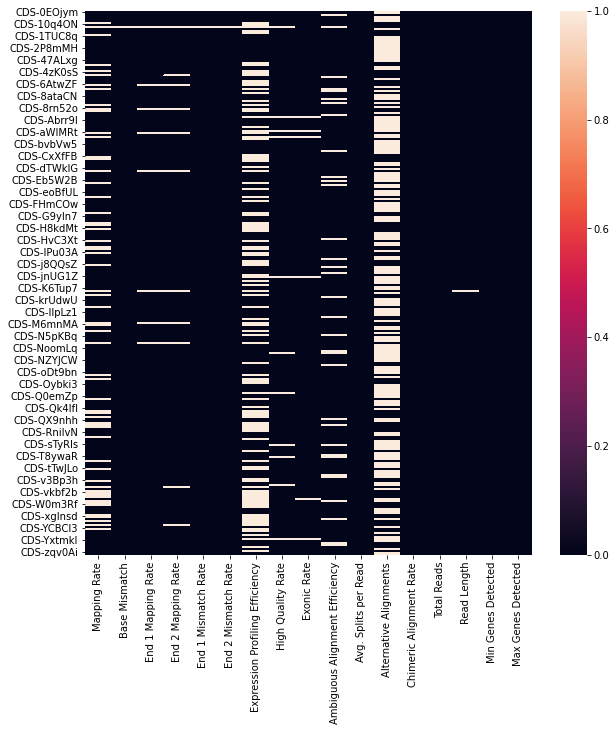

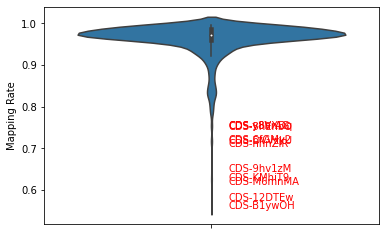

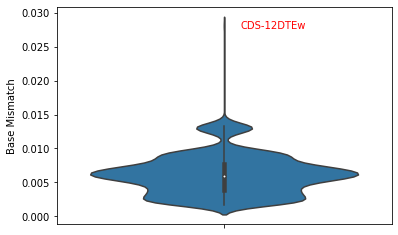

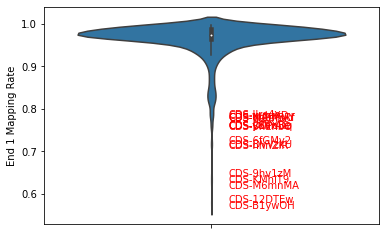

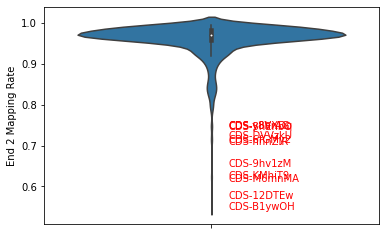

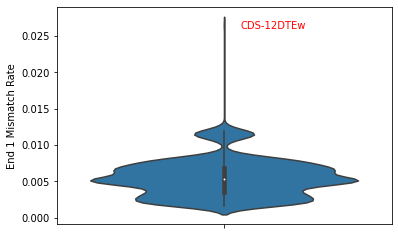

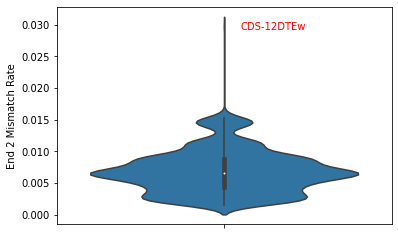

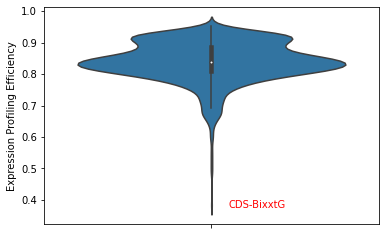

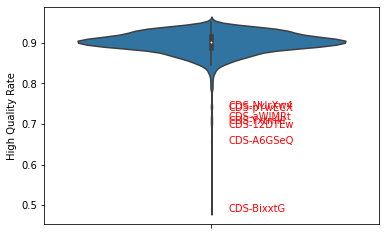

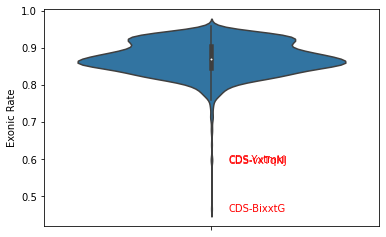

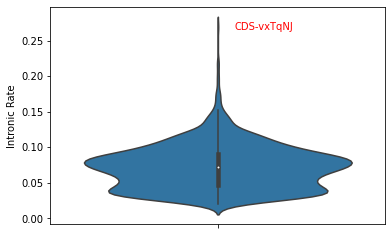

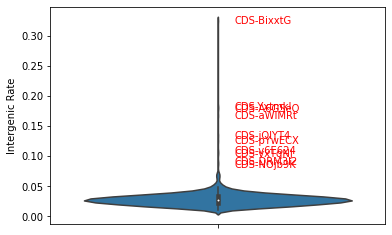

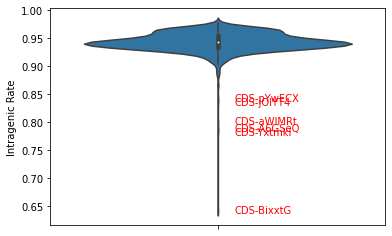

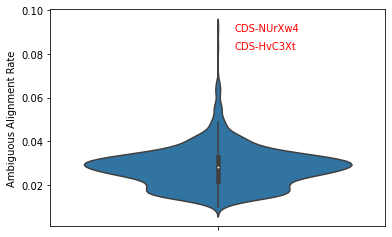

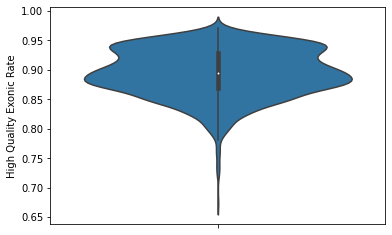

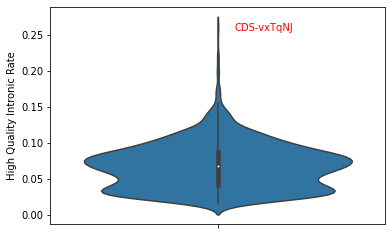

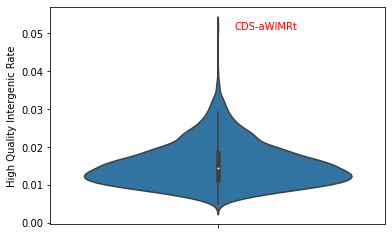

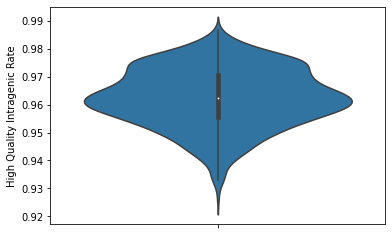

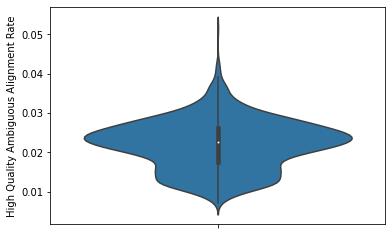

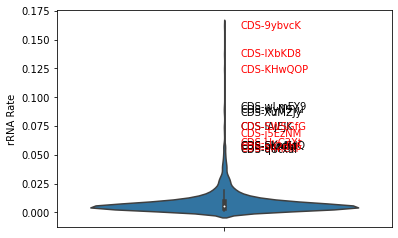

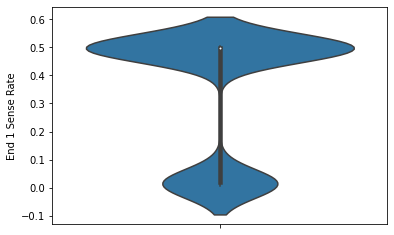

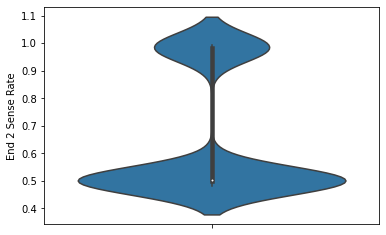

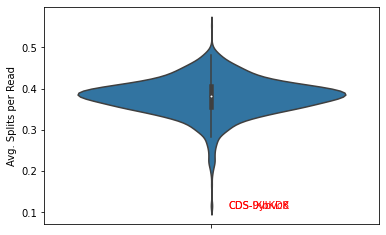

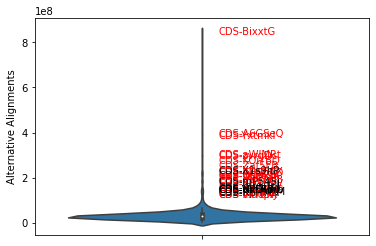

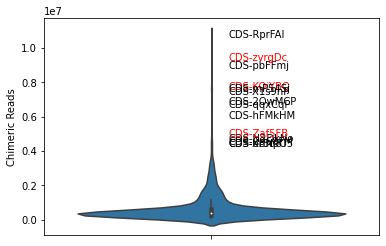

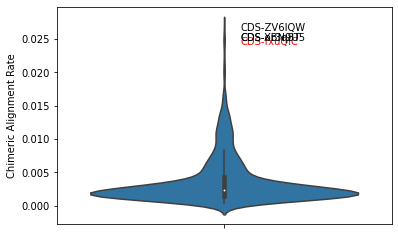

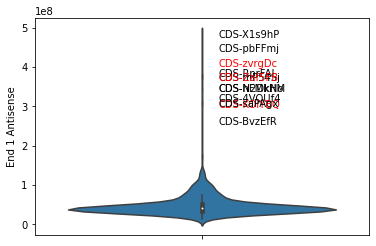

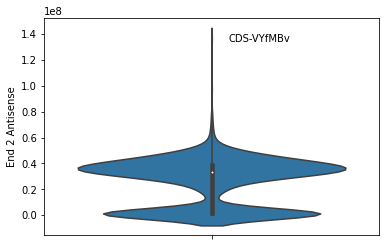

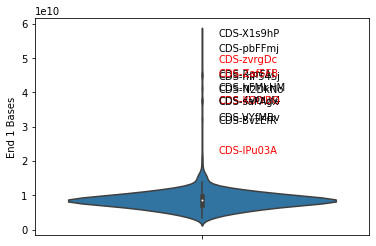

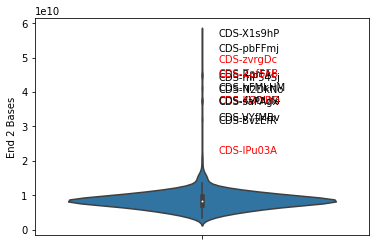

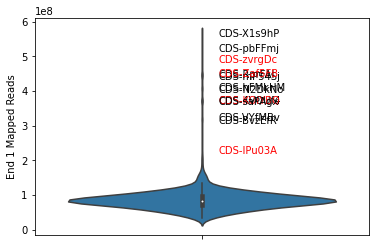

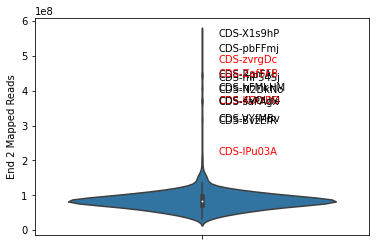

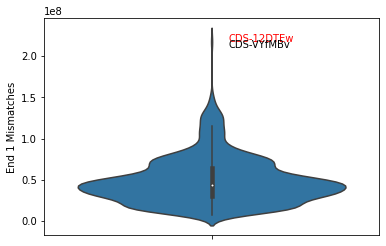

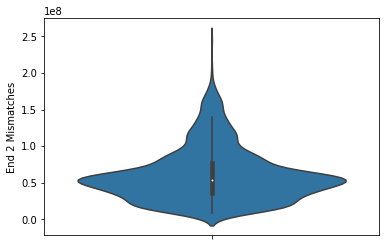

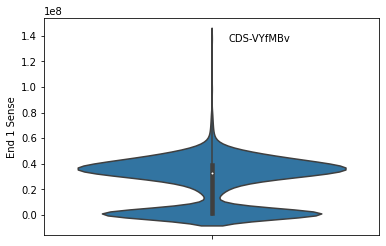

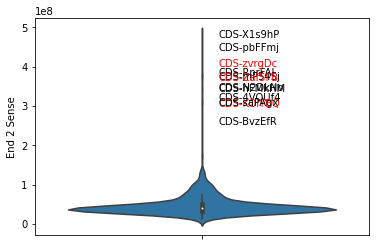

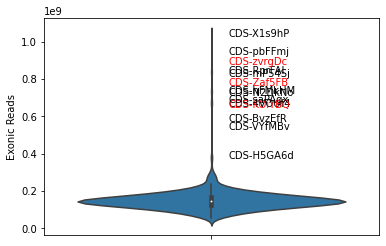

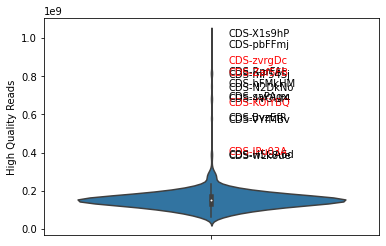

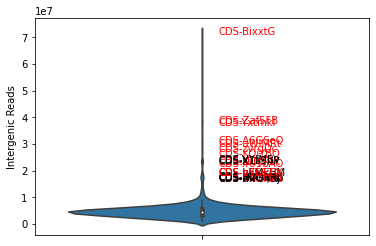

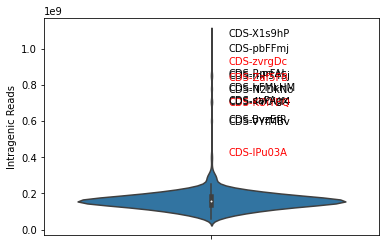

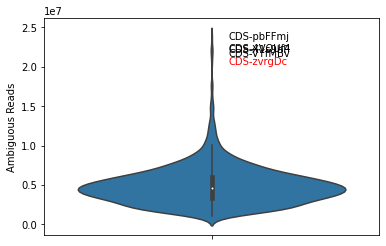

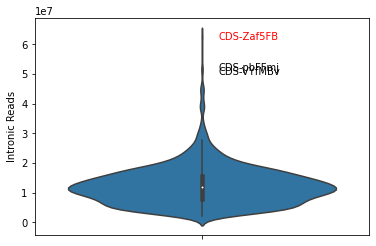

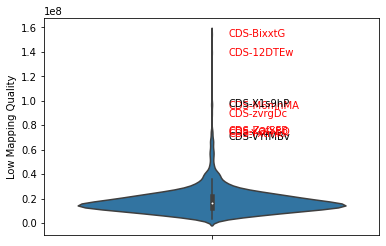

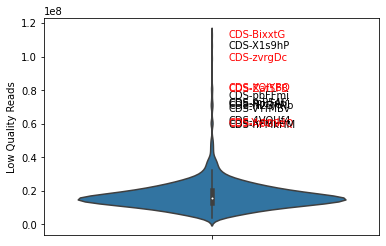

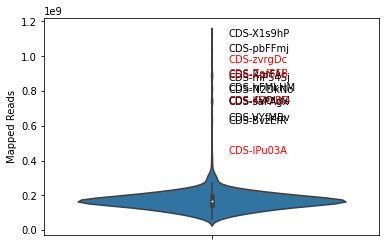

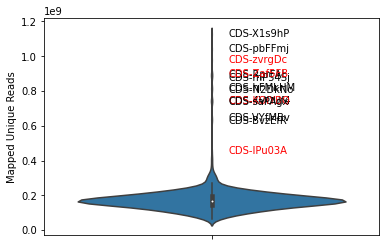

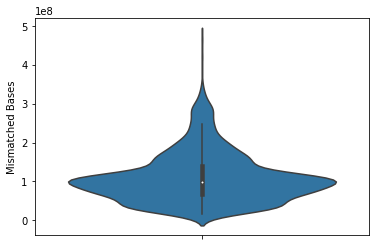

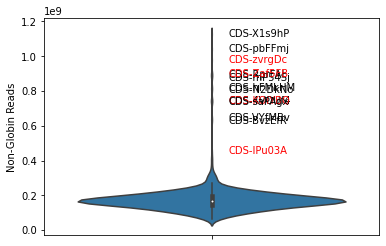

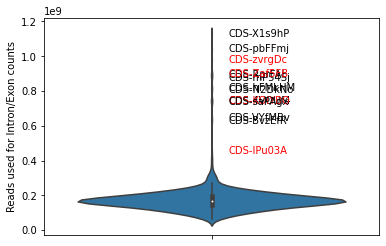

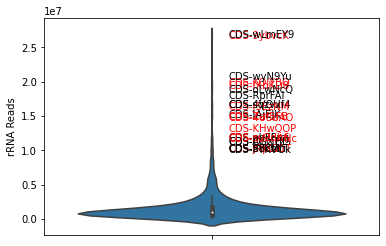

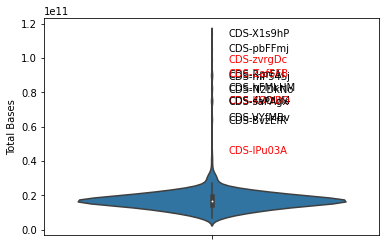

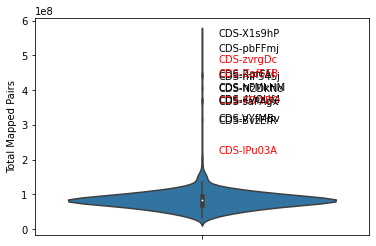

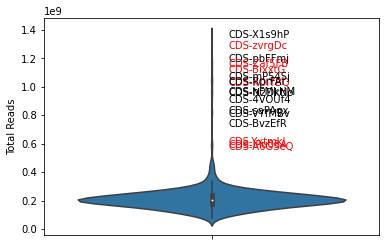

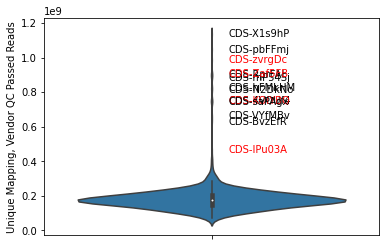

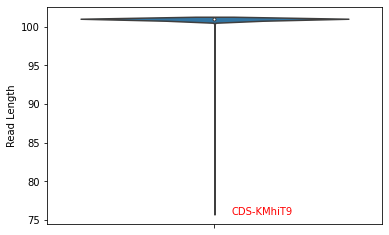

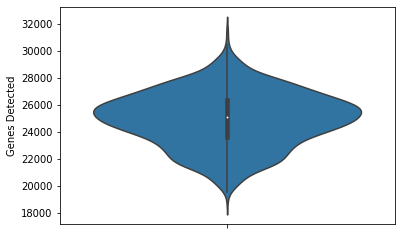

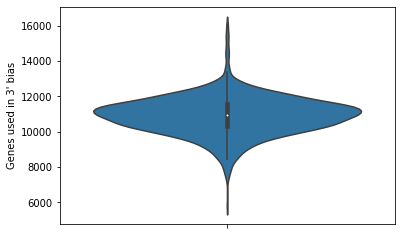

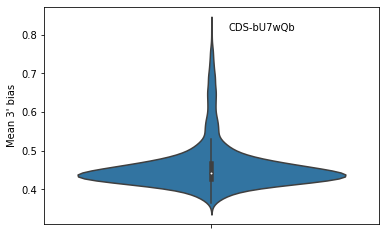

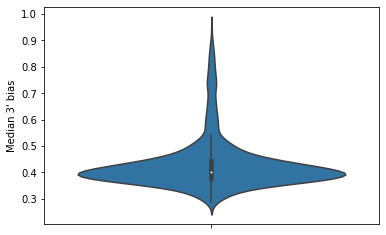

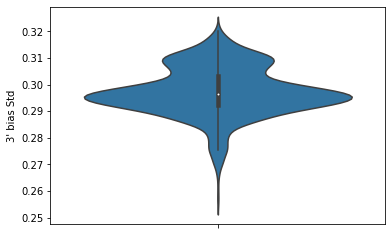

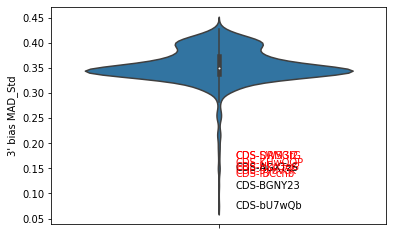

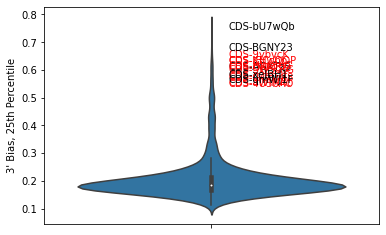

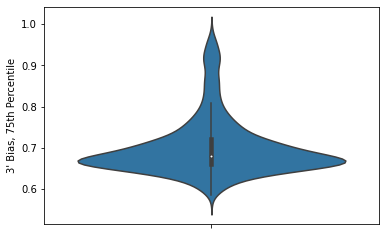

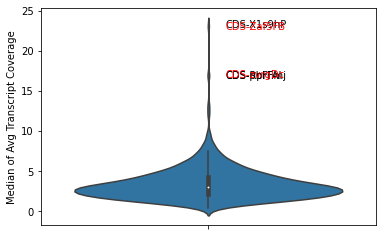

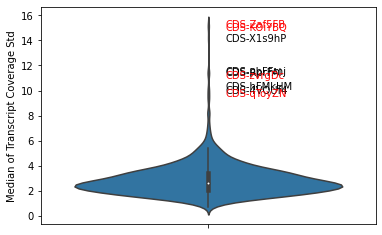

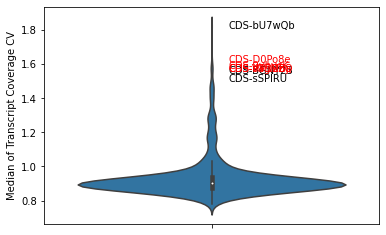

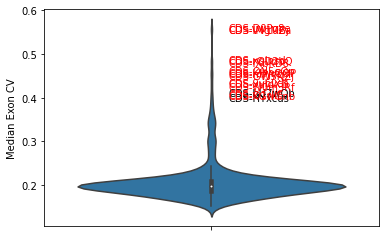

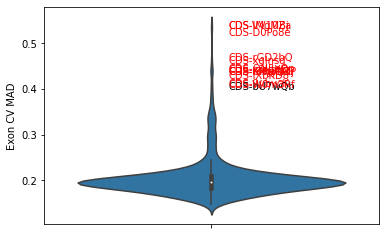

<Figure size 432x288 with 0 Axes>

In [528]:
lowqual = h.filterRNAfromQC(qcs, thresholds={'minmapping': 0.85,
                                          'minendmapping': 0.75,
                                          'minefficiency': 0.75,
                                          'maxendmismatch': 0.02,
                                          'maxmismatch': 0.02,
                                          'minhighqual': 0.8,
                                          'minexon': 0.7,
                                          "maxambiguous": 0.05,
                                          "maxsplits": 0.1,
                                          "maxalt": 0.2,
                                          "maxchim": 0.05,
                                          "minreads": 20000000,
                                          "minlength": 80,
                                          "maxgenes": 35000,
                                          "mingenes": 12000,
                                          }, folder='data/rna_qc_plots/lowqual_'+samplesetname+"/", plot=True, qant1=0.1, qant3=0.9)

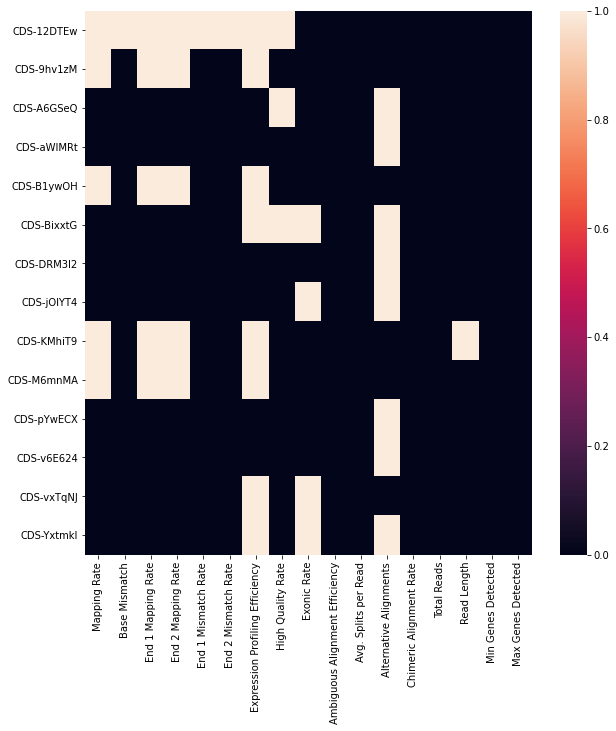

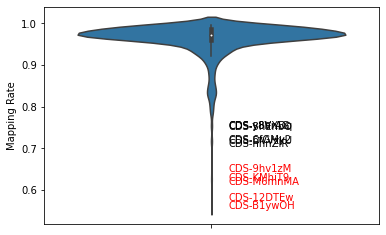

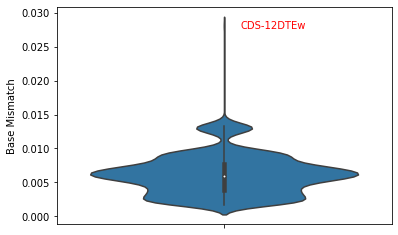

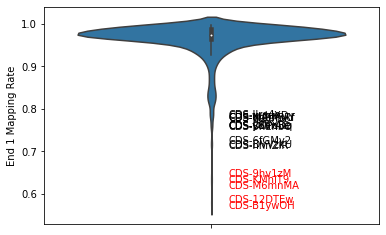

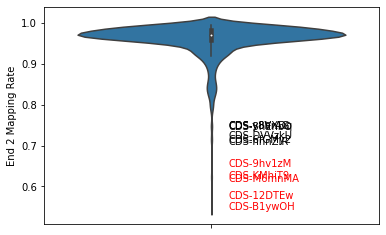

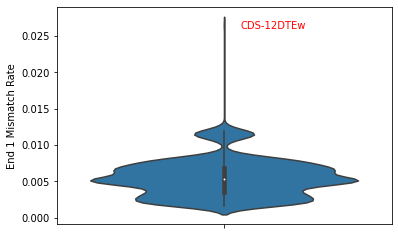

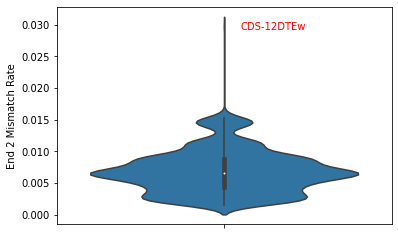

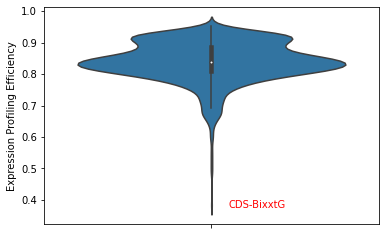

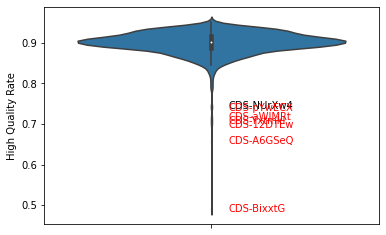

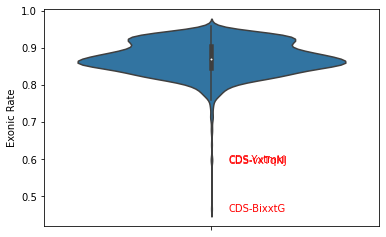

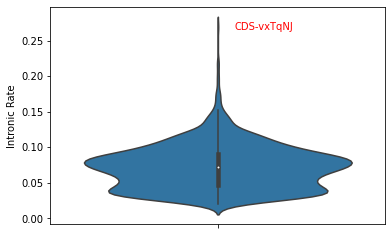

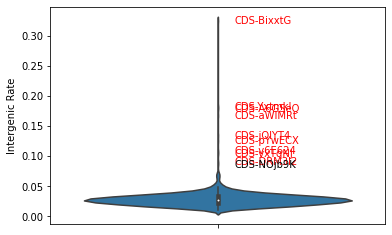

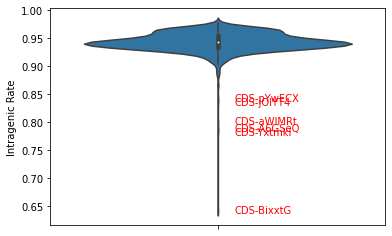

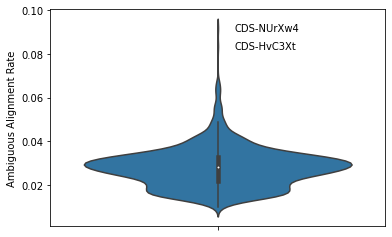

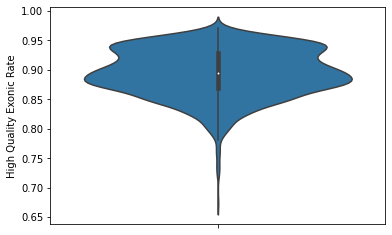

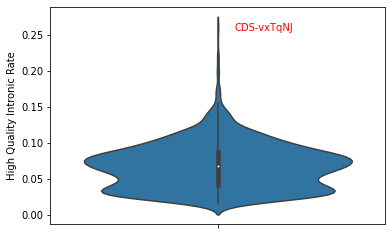

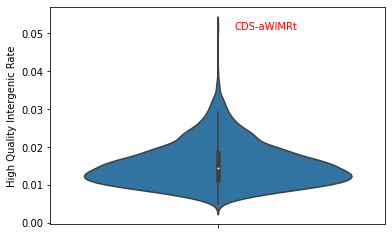

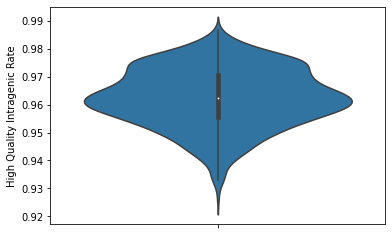

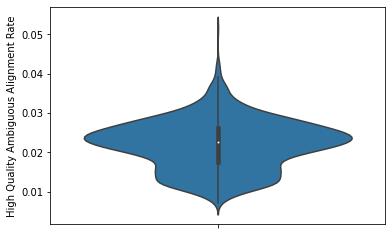

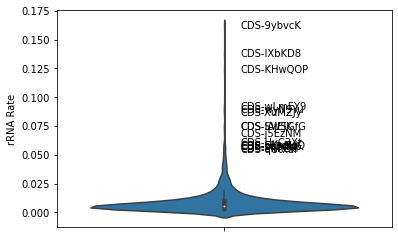

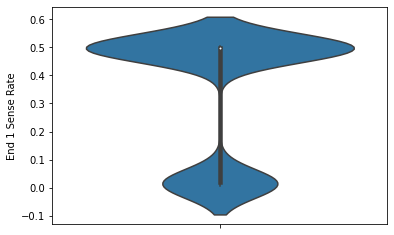

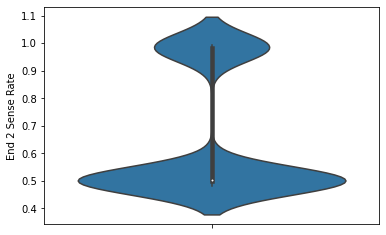

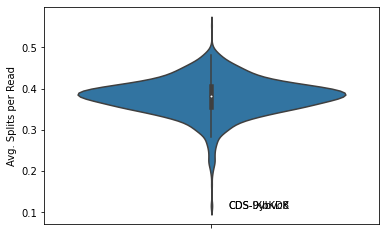

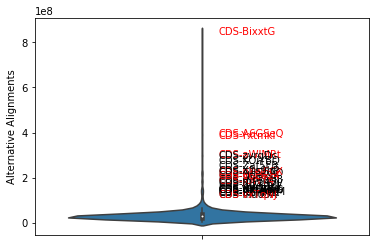

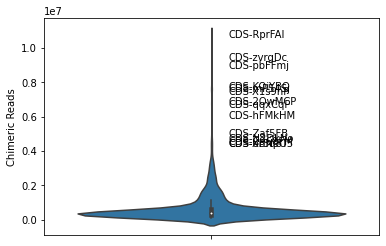

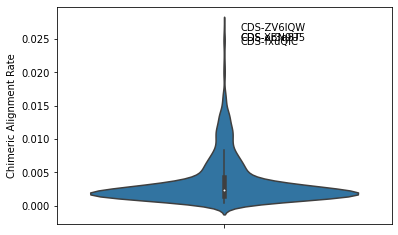

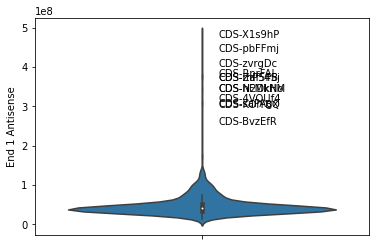

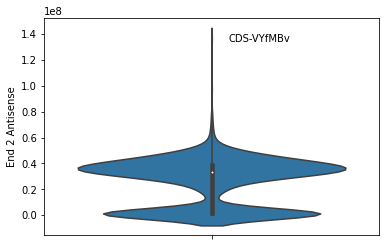

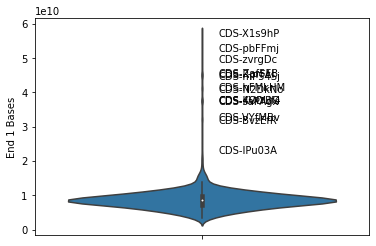

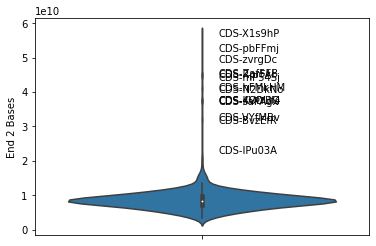

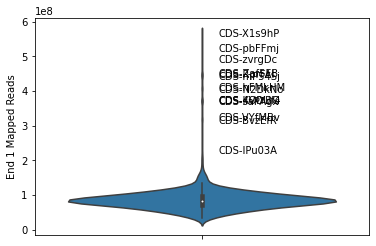

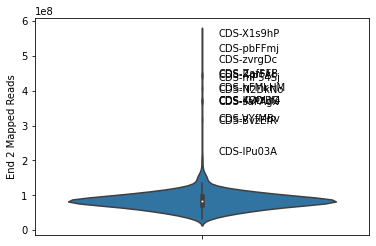

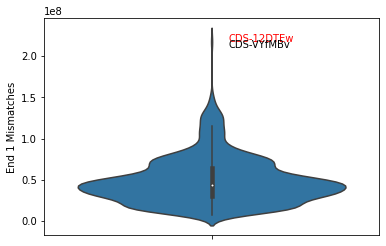

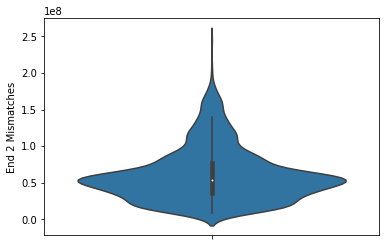

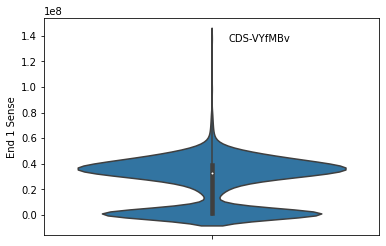

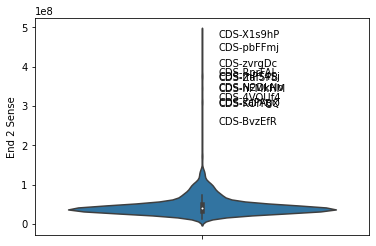

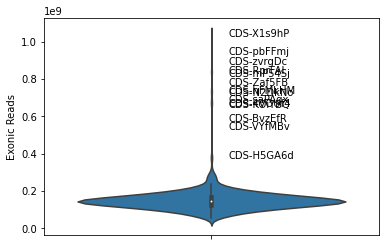

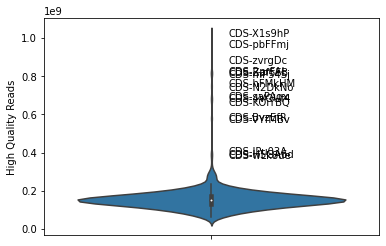

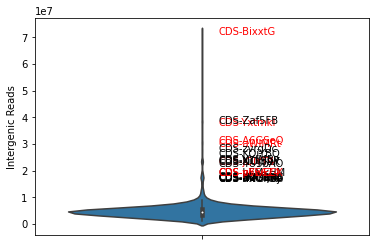

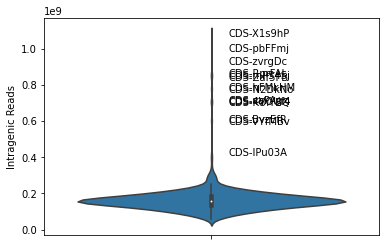

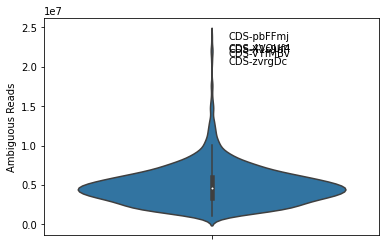

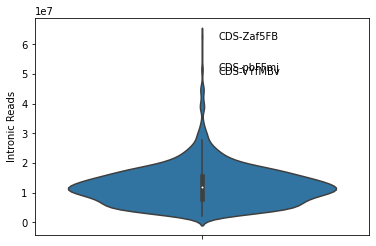

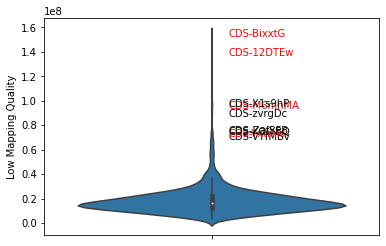

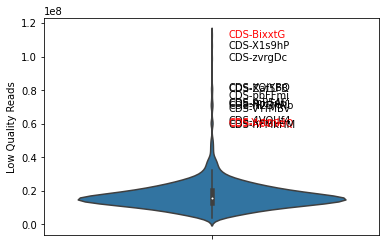

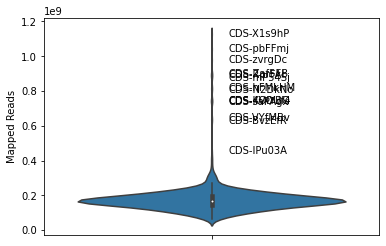

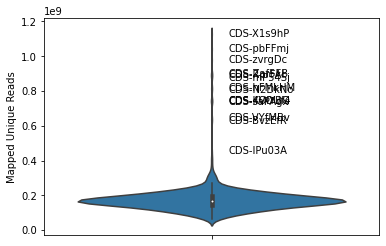

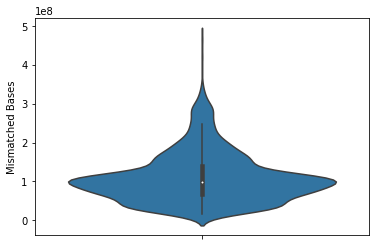

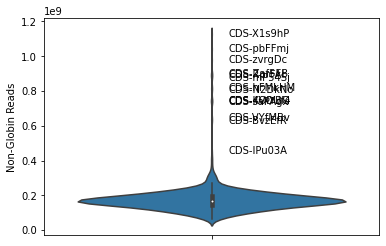

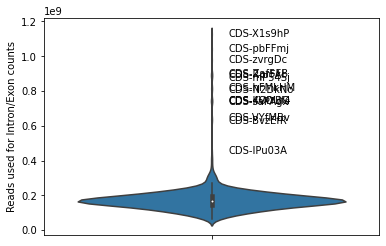

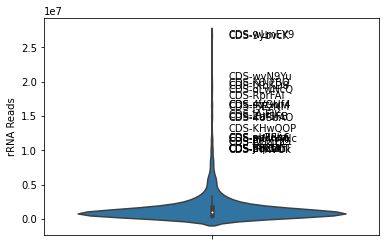

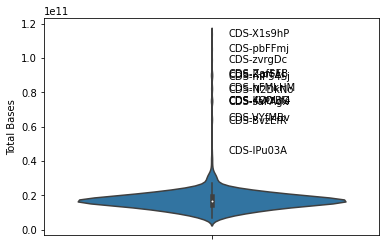

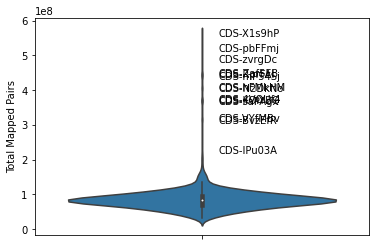

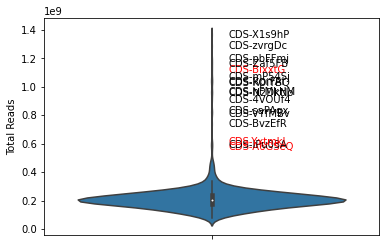

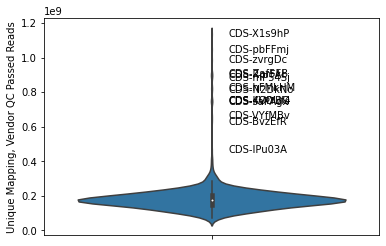

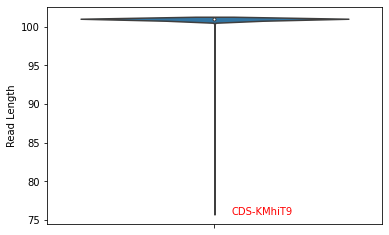

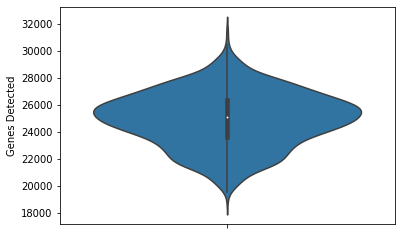

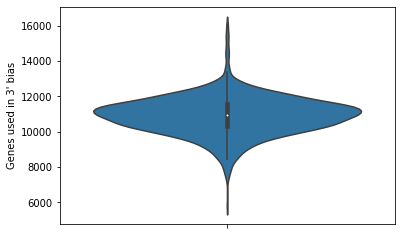

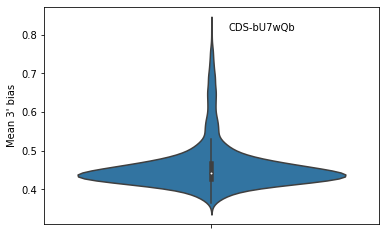

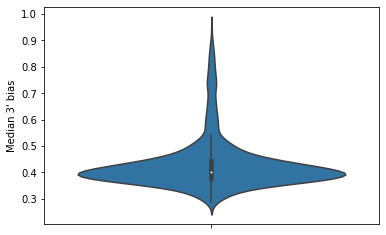

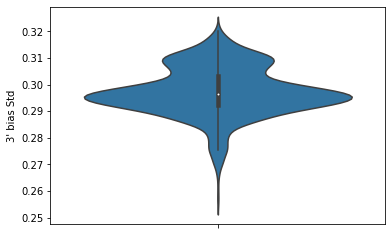

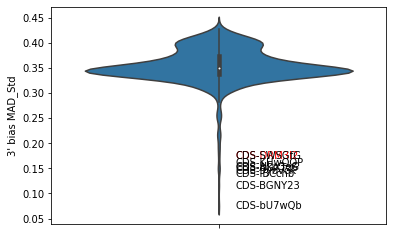

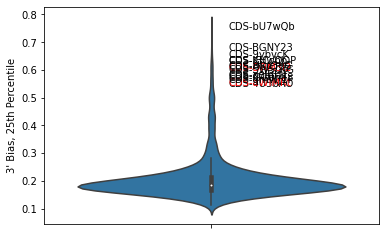

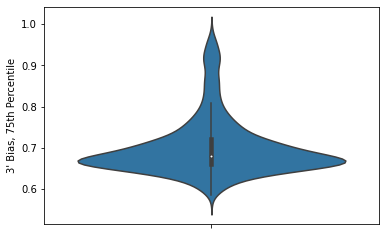

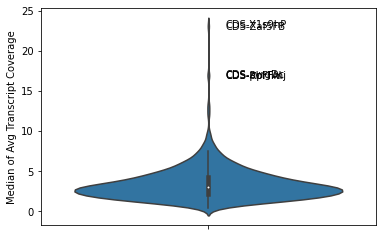

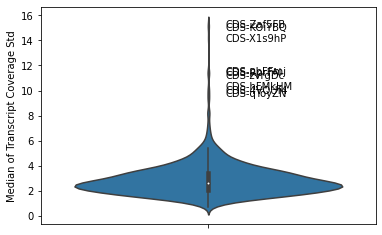

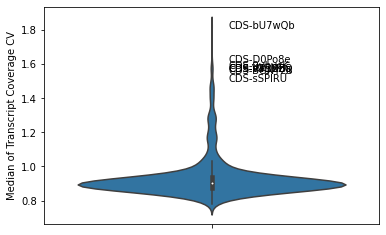

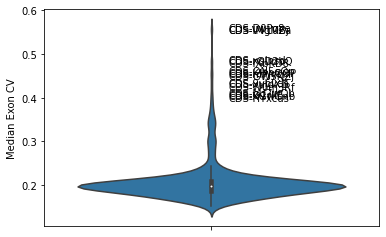

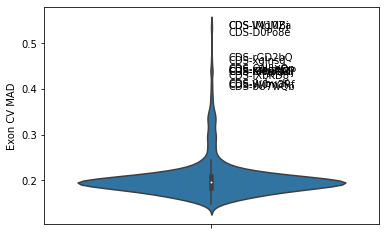

<Figure size 432x288 with 0 Axes>

In [750]:
failed = h.filterRNAfromQC(qcs, thresholds={'minmapping': 0.7,
                                          'minendmapping': 0.66,
                                          'minefficiency': 0.6,
                                          'maxendmismatch': 0.02,
                                          'maxmismatch': 0.02,
                                          'minhighqual': 0.7,
                                          'minexon': 0.66,
                                          "maxambiguous": 0.1,
                                          "maxsplits": 0.1,
                                          "maxalt": 0.5,
                                          "maxchim": 0.2,
                                          "minreads": 20000000,
                                          "minlength": 80,
                                          "maxgenes": 35000,
                                          "mingenes": 10000,
                                          }, folder='data/rna_qc_plots/'+samplesetname+"/", plot=True, qant1=0.07, qant3=0.93)

In [122]:
ccle_refsamples = pd.read_csv('temp/updated_ref_samples.csv',index_col="cds_sample_id")
for k,v in starlogs.items():
    if k =='nan':
        continue
    if ccle_refsamples.loc[k,'bam_qc']!=v[0]:
        ccle_refsamples.loc[k,'bam_qc']=v[0]

### Remove some datafile to save money

In [127]:
res = refwm.get_samples()

In [128]:
colstoremove = ['fastq1', 'fastq2','recalibrated_bam','recalibrated_bam_index']
for val in colstoremove:
    refwm.disable_hound().delete_entity_attributes('sample', res[val], delete_files=True)

Successfully deleted attribute fastq1 for 1497 samples.
Successfully deleted attribute fastq2 for 1497 samples.


KeyError: 'recalibrated_bam'

In [129]:
samplesinset= [i['entityName'] for i in refwm.get_entities('sample_set').loc[samplesetname].samples]

In [134]:
## copy star bam file to our cclebams/rnasq_hg38/ bucket
renamed, _ = terra.changeGSlocation(workspacefrom=refworkspace, newgs="gs://cclebams/rnasq_hg38/", onlysamples=samplesinset, onlycol=["star_bam_file",'star_bam_index'], entity="sample", keeppath=False,dry_run=False)

using the data from broad-firecloud-ccle/DepMap_hg38_RNAseq sample list
this should only contains gs:// paths otherwise precise columns using "onlycol"
Successfully updated attributes '['star_bam_file', 'star_bam_index']' for 7 samples.


In [136]:
ccle_refsamples.loc[samplesinset,['legacy_bam_filepath','legacy_bai_filepath','legacy_size','legacy_crc32c_hash']] = ccle_refsamples.loc[samplesinset][['internal_bam_filepath','internal_bai_filepath','size','crc32c_hash']]
ccle_refsamples.loc[samplesinset,'internal_bam_filepath'] = renamed['star_bam_file']
ccle_refsamples.loc[samplesinset,'internal_bai_filepath'] = renamed['star_bam_index']
ccle_refsamples.loc[samplesinset,'size'] = [gcp.extractSize(i)[1] for i in gcp.lsFiles(renamed['star_bam_file'].tolist(),'-l')]
ccle_refsamples.loc[samplesinset,'crc32c_hash'] = [gcp.extractHash(i) for i in gcp.lsFiles(renamed['star_bam_file'].tolist(),'-L')]
#ccle_refsamples.loc[samplesinset,'md5_hash'] = gcp.catFiles(renamed['hg38_analysis_ready_bam_md5'].tolist(), cut=32)

listing files in gs
listing files in gs


### Expression post processing

Here we get all data and remove the duplicates directly with the function `removeDuplicates`

we then run:

- readTranscripts
- readCounts
- readTPM
- renameFunction

- Allie's gene renaming / filtering and log transform

In [746]:
res = refwm.get_sample_sets().loc['all']
rsem_genes_expected_count = res['rsem_genes_expected_count']
rsem_genes_tpm = res['rsem_genes_tpm']
rsem_transcripts_tpm = res['rsem_transcripts_tpm']
rsem_transcripts_expected_count = res['rsem_transcripts_expected_count']
! gsutil cp $rsem_genes_expected_count "temp/rsem_genes_expected_count" & gsutil cp $rsem_genes_tpm "temp/rsem_genes_tpm" & gsutil cp $rsem_transcripts_tpm "temp/rsem_transcripts_tpm" & gsutil cp $rsem_transcripts_expected_count "temp/rsem_transcripts_expected_count"

Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/f52c019b-8a55-4ca8-9a6c-43c8f75957e4/rsem_aggregate_results_workflow/bd03df9b-e8d1-4b76-9111-90917ce21e89/call-rsem_aggregate_results/all.rsem_genes_expected_count.txt.gz...
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/f52c019b-8a55-4ca8-9a6c-43c8f75957e4/rsem_aggregate_results_workflow/bd03df9b-e8d1-4b76-9111-90917ce21e89/call-rsem_aggregate_results/all.rsem_genes_tpm.txt.gz...
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/f52c019b-8a55-4ca8-9a6c-43c8f75957e4/rsem_aggregate_results_workflow/bd03df9b-e8d1-4b76-9111-90917ce21e89/call-rsem_aggregate_results/all.rsem_transcripts_tpm.txt.gz...
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/f52c019b-8a55-4ca8-9a6c-43c8f75957e4/rsem_aggregate_results_workflow/bd03df9b-e8d1-4b76-9111-90917ce21e89/call-rsem_aggregate_results/all.rsem_transcripts_expected_count.txt.gz...
\ [1 files][ 75.1 MiB/ 75.1 MiB]                                          

In [872]:
files = {}
for val in ["temp/rsem_transcripts_tpm","temp/rsem_genes_tpm", "temp/rsem_genes_expected_count","temp/rsem_transcripts_expected_count"]:
    file = pd.read_csv(val, compression='gzip', header=0, sep='\t', quotechar='"', error_bad_lines=False)
    
    print(file.columns[:10])
    
    file = file.drop(columns=set(failed.index))
    renaming  = removeOlderVersions(names=file.columns[2:], refsamples=refwm.get_samples(), arxspan_id="arxspan_id", version="version")
    renaming.update({'transcript_id(s)':'transcript'})
    files[val.split('/')[-1]] = file[file.columns[:2].tolist()+[i for i in file.columns[2:] if i in renaming.keys()]].rename(columns=renaming)

Index(['transcript_id', 'gene_id', 'CDS-010xbm', 'CDS-02TzJp', 'CDS-0693hw',
       'CDS-07Plat', 'CDS-0BNTL7', 'CDS-0CqPRM', 'CDS-0EOjym', 'CDS-0Jkjew'],
      dtype='object')
removed 66 duplicate samples
Index(['gene_id', 'transcript_id(s)', 'CDS-010xbm', 'CDS-02TzJp', 'CDS-0693hw',
       'CDS-07Plat', 'CDS-0BNTL7', 'CDS-0CqPRM', 'CDS-0EOjym', 'CDS-0Jkjew'],
      dtype='object')
removed 66 duplicate samples
Index(['gene_id', 'transcript_id(s)', 'CDS-010xbm', 'CDS-02TzJp', 'CDS-0693hw',
       'CDS-07Plat', 'CDS-0BNTL7', 'CDS-0CqPRM', 'CDS-0EOjym', 'CDS-0Jkjew'],
      dtype='object')
removed 66 duplicate samples
Index(['transcript_id', 'gene_id', 'CDS-010xbm', 'CDS-02TzJp', 'CDS-0693hw',
       'CDS-07Plat', 'CDS-0BNTL7', 'CDS-0CqPRM', 'CDS-0EOjym', 'CDS-0Jkjew'],
      dtype='object')
removed 66 duplicate samples


In [874]:
server = BiomartServer( "http://www.ensembl.org/biomart" )
ensmbl = server.datasets['hsapiens_gene_ensembl']
ensembltohgnc = pd.read_csv(io.StringIO(ensmbl.search({
  'attributes': ['ensembl_gene_id','clone_based_ensembl_gene','hgnc_symbol','gene_biotype','entrezgene_id']
}, header=1).content.decode()), sep='\t')

ensembltohgnc.columns = ['ensembl_gene_id','clone_based_ensembl_gene','hgnc_symbol','gene_biotype','entrezgene_id']
ensembltohgnc = ensembltohgnc[~(ensembltohgnc['clone_based_ensembl_gene'].isna() & ensembltohgnc['hgnc_symbol'].isna())]
ensembltohgnc.loc[ensembltohgnc[ensembltohgnc.hgnc_symbol.isna()].index,"hgnc_symbol"] = ensembltohgnc[ensembltohgnc.hgnc_symbol.isna()]['clone_based_ensembl_gene']

gene_rename =  {i.ensembl_gene_id: i.hgnc_symbol+' ('+i.ensembl_gene_id+')' for k,i in ensembltohgnc.iterrows()}

In [882]:
protcod_rename = {i.ensembl_gene_id: i.hgnc_symbol+' ('+str(int(i.entrezgene_id))+')' for _,i in ensembltohgnc[(~ensembltohgnc.entrezgene_id.isna()) & (ensembltohgnc.gene_biotype=='protein_coding')].iterrows()}

In [884]:
for val in ['rsem_genes_expected_count','rsem_genes_tpm']:
    file = files[val].drop(columns='transcript').set_index('gene_id')
    file = file[(file.sum(1) != 0) & (file.var(1) != 0)]
    r = [i.split('.')[0] for i in file.index]
    dup = h.dups(r)
    if len(dup)>0:
        print(dup)
        raise ValueError('duplicate genes')
    file.index = r
    files[val.replace('genes','proteincoding_genes')] = file[file.index.isin(set(ensembltohgnc[ensembltohgnc.gene_biotype == 'protein_coding'].ensembl_gene_id))]
    files[val] = file.rename(index=gene_rename).T
    files[val.replace('genes','proteincoding_genes')] = files[val.replace('genes','proteincoding_genes')].rename(index=protcod_rename).T

In [885]:
rename_transcript = {}
missing = []
for val in ['rsem_transcripts_expected_count','rsem_transcripts_tpm']:
    file = files[val]
    file = file[(file[file.columns[2:]].sum(1) != 0) & (file[file.columns[2:]].var(1) != 0)]
    r = [i.split('.')[0] for i in file.transcript_id]
    dup = h.dups(r)
    if len(dup)>0:
        print(dup)
        raise ValueError('duplicate genes')    
    file.transcript_id = r
    if len(rename_transcript)==0:
        for _,v in file.iterrows():
            if v.gene_id.split('.')[0] in gene_rename:
                rename_transcript[v.transcript_id] = gene_rename[v.gene_id.split('.')[0]].split(' (')[0] + ' (' + v.transcript_id + ')'
            else:
                missing.append(v.gene_id.split('.')[0])
        print('missing: '+str(len(missing))+' genes')
    files[val] = file.set_index('transcript_id').drop(columns = 'gene_id').rename(index = rename_transcript).T

/home/jeremie/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


missing: 1013 genes


/home/jeremie/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### saving samples used for the release

In [529]:
ccle_refsamples.loc[set(renaming.keys())-set(['transcript_id(s)']),release]=1
ccle_refsamples.loc[ccle_refsamples[ccle_refsamples.datatype=='rna'].index,'low_quality']=0
ccle_refsamples.loc[lowqual.index,'low_quality']=1
ccle_refsamples.to_csv('temp/updated_ref_samples.csv')

In [329]:
prevcounts = tc.get(name='depmap-rnaseq-expression-data-363a', version=26, file="internal_"+prevname+'_counts')
prevgenes = tc.get(name='depmap-rnaseq-expression-data-363a', version=26, file="internal_"+prevname+'_tpm')
prevtranscripts = tc.get(name='depmap-rnaseq-expression-data-363a', version=26, file="internal_"+prevname+'_transcripts_tpm')
prevproteincoding = tc.get(name='depmap-rnaseq-expression-data-363a', version=26, file="internal_"+prevname+'_proteincoding_tpm')

## validation

In [467]:
files.keys()

dict_keys(['rsem_transcripts_tpm', 'rsem_genes_tpm', 'rsem_genes_expected_count', 'rsem_transcripts_expected_count', 'rsem_proteincoding_genes_expected_count', 'rsem_proteincoding_genes_tpm'])

In [773]:
rename = {}
for k, val in failed.iterrows():
    a = ccle_refsamples.loc[k].arxspan_id
    if len(ccle_refsamples[(ccle_refsamples.datatype=='rna')&(ccle_refsamples.arxspan_id==a)])==1:
        rename[a] = list(val[val].index)
    else:
        print("we had something else")

we had something else


In [774]:
lost = set(prevproteincoding.index) - set(files['rsem_proteincoding_genes_tpm'].index)

In [775]:
lost = lost - set(rename.keys())

In [772]:
len(prevcounts), len(files['rsem_genes_expected_count'])

(1415, 1417)

In [776]:
lost

{'ACH-000561'}

In [745]:
%store rename

Stored 'rename' (dict)


### do we have new duplicates that don't correlate well and why?

In [867]:
files.keys()

dict_keys(['rsem_transcripts_tpm', 'rsem_genes_tpm', 'rsem_genes_expected_count', 'rsem_transcripts_expected_count', 'rsem_proteincoding_genes_expected_count', 'rsem_proteincoding_genes_tpm'])

In [886]:
overlap = set(files['rsem_genes_expected_count'].columns) & set(prevcounts.columns)

In [599]:
unmatched = h.getDifferencesFromCorrelations(files['rsem_genes_expected_count'][overlap] ,prevcounts[overlap], minsimi=0.95)

ACH-001577 not in second df
ACH-001434 not in second df
ACH-001686 not in second df
ACH-002463 not in second df
ACH-002055 not in second df
ACH-001759 not in second df
ACH-002476 not in second df
ACH-001756 not in second df
ACH-001760 not in second df
ACH-001388 not in second df
ACH-001758 not in second df
found 0 samples that did not match


In [601]:
files.keys()

dict_keys(['rsem_transcripts_tpm', 'rsem_genes_tpm', 'rsem_genes_expected_count', 'rsem_transcripts_expected_count', 'rsem_proteincoding_genes_expected_count', 'rsem_proteincoding_genes_tpm'])

In [887]:
overlap

{'TREML1 (ENSG00000161911)',
 'BCL2 (ENSG00000171791)',
 'AL662844.1 (ENSG00000255726)',
 'AL136140.1 (ENSG00000237530)',
 'ZNF280C (ENSG00000056277)',
 'PLP2 (ENSG00000102007)',
 'AC093110.1 (ENSG00000238018)',
 'AC139792.3 (ENSG00000279995)',
 'RNU4-52P (ENSG00000206936)',
 'AL355493.1 (ENSG00000215409)',
 'OR5E1P (ENSG00000170688)',
 'AL389915.1 (ENSG00000236005)',
 'AC234775.3 (ENSG00000261101)',
 'LINC01805 (ENSG00000223863)',
 'AC004888.1 (ENSG00000231295)',
 'URB2 (ENSG00000135763)',
 'SIDT1 (ENSG00000072858)',
 'AL022328.2 (ENSG00000273137)',
 'EFEMP1 (ENSG00000115380)',
 'YPEL5P3 (ENSG00000258251)',
 'FTH1P27 (ENSG00000234355)',
 'AL392088.1 (ENSG00000226483)',
 'RPL21P2 (ENSG00000215063)',
 'AFM (ENSG00000079557)',
 'TECRP2 (ENSG00000248565)',
 'KRTCAP3 (ENSG00000157992)',
 'CAPZB (ENSG00000077549)',
 'DDX17 (ENSG00000100201)',
 'AP005436.3 (ENSG00000255516)',
 'ZMAT1 (ENSG00000166432)',
 'AC092919.1 (ENSG00000240497)',
 'KRT20 (ENSG00000171431)',
 'RPS12P16 (ENSG00000215184)

In [889]:
for k, _ in [('ACH-000561','')]:#+unmatched
    files['rsem_genes_expected_count'].loc[k] = prevcounts.loc[k][overlap]
    files['rsem_genes_tpm'].loc[k] = (2**prevgenes.loc[k][overlap])-1
    
    overlap = set(files['rsem_transcripts_tpm'].columns)&set(prevtranscripts.columns)
    files['rsem_transcripts_tpm'].loc[k] = (2**prevtranscripts.loc[k][overlap])-1
    
    overlap = set(files['rsem_proteincoding_genes_tpm'].columns)&set(prevproteincoding.columns)
    files['rsem_proteincoding_genes_tpm'].loc[k] = (2**prevproteincoding.loc[k][overlap])-1

In [ ]:
# Is it because of  duplicate version?
rnasamples = ccle_refsamples[ccle_refsamples.datatype=='rna']
for i,val in unmatched:
    print(len(rnasamples[rnasamples.arxspan_id==i]))

## ssGSEA

In [754]:
counts_genes = files['rsem_genes_expected_count'].copy()

In [755]:
counts_genes.columns = [i.split(' (')[0] for i in counts_genes.columns]

In [756]:
for i in h.dups(counts_genes.columns):
    val = counts_genes[i].sum(1)
    counts_genes=counts_genes.drop(columns=i)
    counts_genes[i]=val

/home/jeremie/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [757]:
len(set([val.split('.')[0] for val in counts_genes.columns if '.' in val]))

10233

In [758]:
#### merging splicing variants into the same gene
counts_genes_merged, _, _= h.mergeSplicingVariants(counts_genes.T, defined='.')

renamed: 3755 genes and dropped 7473


In [759]:
counts_genes_merged.shape

you need to have JKBio in your path:
e.g. have installed JKBio in the same folder as ccle_processing


(47551, 1417)

### with R ssGSEA on the console

In [760]:
enrichments= h.gsva(counts_genes_merged, pathtoJKBio="../JKBio/", geneset_file = "data/genesets/ALL.gmt", method='ssgsea')

please be carefull:
 your datafile must contains no duplicates and have hgnc gene names as index (and be named 'gene_id')and samples as columns
CompletedProcess(args='Rscript ../JKBio//helper/ssGSEA.R /tmp/data_JKBIOhelper_gsva.csv data/genesets/ALL.gmt ssgsea', returncode=0, stdout=b'Estimating ssGSEA scores for 10103 gene sets.\n\r  |                                                                            \r  |                                                                      |   0%Using parallel with 12 cores\n\r  |                                                                            \r  |                                                                      |   1%\r  |                                                                            \r  |=                                                                     |   1%\r  |                                                                            \r  |=                                                                

### Some predictions

In [ ]:
metadata = tc.get(name='depmap-a0ab', file='sample_info')

In [610]:
metadata

NameError: name 'metadata' is not defined

In [ ]:
# finding train and test set
trainame = [val for val in new1&prev if val[:3] == 'ACH']
testname = [val for val in new1-prev if val[:3] == 'ACH']

#looking at the 2000 most variable genes in the two sets
genetolookfor = 2000
gene_var = counts_genes[trainame].var(1).values
print(len(gene_var))
sorting = np.argsort(gene_var)[-genetolookfor:]

In [ ]:
unregistered = set(testname) - set(metadata["DepMap_ID"].values.tolist())
unregistered

In [ ]:
len(counts_genes['ACH-001767']) - np.count_nonzero(counts_genes['ACH-001767'].values)

In [ ]:
# creating and reodering train and test sets
traindata = counts_genes[set(trainame)-unregistered].values[sorting].T
trainlabels = [metadata[metadata["DepMap_ID"]==val]["disease"].values[0] for val in counts_genes[set(trainame)-unregistered].columns.tolist() if val not in unregistered]

testdata = counts_genes[set(testname)-unregistered].values[sorting].T
testlabels = [metadata[metadata["DepMap_ID"]==val]["disease"].values[0] for val in counts_genes[set(testname)-unregistered].columns.tolist() if val not in unregistered]

In [ ]:
traindata.shape

In [ ]:
# learn KNN classifier to the metadata diseases
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(traindata, trainlabels) 
predicted = neigh.predict(testdata)

In [ ]:
predicted[1]

In [ ]:
labels = trainlabels + testlabels
colors=[0]*len(trainlabels)
colors.extend([1,2,2,2,2,1,2,2,2,1,2])
data = np.vstack([traindata,testdata])

In [ ]:
# plot them with TSNE, highlight the points that failed and show colors for diseases
dimred = TSNE(2,10).fit_transform(data)

In [ ]:
scatter(dimred, labels=labels,colors=colors, radi=1.9)

## Save files for taiga

In [859]:
!ls temp/gene_sets_*

temp/gene_sets_20Q4_all.csv  temp/gene_sets_20Q4_All.csv


In [778]:
enrichments.to_csv('temp/gene_sets_'+release+'_all.csv')

In [893]:
for k,val in files.items():
    val.to_csv('temp/'+k.replace('rsem','expression_'+release)+'.csv')

In [860]:
tc.update_dataset(dataset_permaname="expression-d035",
                 upload_file_path_dict={
    'temp/expression_'+release+'_transcripts_tpm.csv': 'NumericMatrixCSV',
    'temp/expression_'+release+'_genes_tpm.csv': 'NumericMatrixCSV',
    'temp/expression_'+release+'_genes_expected_count.csv': 'NumericMatrixCSV',
    'temp/expression_'+release+'_proteincoding_genes_expected_count.csv': 'NumericMatrixCSV',
    'temp/expression_'+release+'_proteincoding_genes_tpm.csv': 'NumericMatrixCSV',
    'temp/expression_'+release+'_transcripts_expected_count.csv': 'NumericMatrixCSV',
    'temp/gene_sets_'+release+'_all.csv': 'NumericMatrixCSV'
                 },
                  dataset_description=
"""
# RNAseq

PORTAL TEAM SHOULD NOT USE THIS: There are lines here that should not make it even to internal.

/!\ This is the most up to date version of the CCLE CN data.
The data is most likely of a better quality that what is on other folder. It is however in beta version as not all changes have either been confirmed or accepted by the DepMap Ops and the DepMap Portal Team.

## Versions:

v1: first version from 20Q4. with new gene cn compute, full reprocessing of the data, removal of non reproducible samples or samples that failed QC.

## Annotations:

transcriptions (Transcripts rpkm):

genes (gene rpkm):
__Rows__:
__Columns__:
Counts (gene counts):
__Rows__:
__Columns__:
Gene level CN data:
__Rows__:
__Columns__:
 DepMap cell line IDs
 gene names in the format HGNC\_symbol (Entrez\_ID)
DepMap\_ID, Chromosome, Start, End, Num\_Probes, Segment\_Mean
""")

Uploading expression_20Q4_transcripts_tpm...
hitting https://cds.team/taiga/api/datafile/8e156b8212e646089f40f4786e31b332
Conversion and upload...:
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size 

	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploadin

	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploadin

	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploadin

	 Conversion in progress, line 1000
	 Conversion in progress, line 1000
	 Conversion in progress, line 1250
	 Conversion in progress, line 1250
	 Conversion in progress, line 1250
	 Conversion in progress, line 1250
	 Conversion in progress, line 1250
	 Conversion in progress, line 1250
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploadin

	 Conversion in progress, line 250
	 Conversion in progress, line 250
	 Conversion in progress, line 250
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in prog

	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploadin

'a020a0621995482098a2d95fe8839e8d'

## Fusion post processing

In [ ]:
terra.waitForSubmission(refworkspace, submission_id2)

In [781]:
aggregated = refwm.get_sample_sets().loc['All_samples']['fusions_star']

In [782]:
! gsutil cp $aggregated "temp/expression.fusion.tsv"

Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/b115f965-c3e0-4b23-b5f9-c879743bb6f1/aggregate_set_files_workflow/5cc04c26-b28a-4ccb-a3e3-82650b775d22/call-aggregate_set_files/attempt-3/Fusions.aggregated.tsv...
\ [1 files][ 96.9 MiB/ 96.9 MiB]                                                
Operation completed over 1 objects/96.9 MiB.                                     


In [783]:
fusions = pd.read_csv('temp/expression.fusion.tsv', names=['DepMap_ID', 'FusionName', 'JunctionReadCount', 'SpanningFragCount', 'SpliceType', 'LeftGene', 'LeftBreakpoint', 'RightGene', 'RightBreakpoint', 'LargeAnchorSupport', 'FFPM', 'LeftBreakDinuc', 'LeftBreakEntropy', 'RightBreakDinuc', 'RightBreakEntropy','annots'], skiprows=1, sep='\t')
fusions["DepMap_ID"] = [i.split('.')[0] for i in fusions['DepMap_ID']]

In [786]:
print(len(fusions))
renaming = removeOlderVersions(names=set(fusions['DepMap_ID']), refsamples=refwm.get_samples(), arxspan_id="arxspan_id", version="version")
fusions = fusions[fusions['DepMap_ID'].isin(renaming.keys())].replace({'DepMap_ID':renaming}).reset_index(drop=True)
print(len(fusions))
print(fusions['DepMap_ID'][:10])

376251
removed 65 duplicate samples
359778
0    ACH-001113
1    ACH-001113
2    ACH-001113
3    ACH-001113
4    ACH-001113
5    ACH-001113
6    ACH-001113
7    ACH-001113
8    ACH-001113
9    ACH-001113
Name: DepMap_ID, dtype: object


In [787]:
fusions['CCLE_count'] = [i.LeftBreakpoint+'_'+i.RightBreakpoint for k, i in fusions.iterrows()]
counts = Counter(list(fusions['CCLE_count']))
fusions['CCLE_count'] = [counts[val] for val in fusions['CCLE_count']]

In [666]:
fusions['FFPM']

KeyError: 'FFPM'

In [824]:
len(fusions[~(fusions['CCLE_count']>len(set(fusions['DepMap_ID']))*0.1)])

283737

In [831]:
filtered = filterFusions(fusions, maxfreq=0.1)

## Generate filtered fusion table

We want to apply filters to the fusion table to reduce the number of artifacts in the dataset. Specifically, we filter the following:

* Remove fusions involving mitochondrial chromosomes, or HLA genes, or immunoglobulin genes
* Remove red herring fusions (from STAR-Fusion annotations column)
* Remove recurrent in CCLE (>= 25 samples)
* Remove fusion with (SpliceType=" INCL_NON_REF_SPLICE" and LargeAnchorSupport="No" and FFPM < 0.1)
* Remove fusions with FFPM < 0.05 (STAR-Fusion suggests using 0.1, but looking at the translocation data, this looks like it might be too aggressive)


In [846]:
fusions.RightGene = renameFusionGene(fusions.RightGene)
fusions.LeftGene = renameFusionGene(fusions.LeftGene)
filtered.RightGene = renameFusionGene(filtered.RightGene)
filtered.LeftGene = renameFusionGene(filtered.LeftGene)

In [857]:
len(set(fusions.DepMap_ID))

1412

In [852]:
fusions = fusions[~fusions.DepMap_ID.isin(rename.keys())]
filtered = filtered[~filtered.DepMap_ID.isin(rename.keys())]

In [ ]:
ls temp/un

In [855]:
fusions.to_csv('temp/unfiltered_fusions_'+release+'.csv',index=False)
filtered.to_csv('temp/fusions_'+release+'.csv',index=False)

## Uploading to Taiga

In [854]:
tc.update_dataset(dataset_permaname="fusions-95c9",
                     upload_file_path_dict={
                'temp/fusions_'+release+'.csv': 'TableCSV',
                'temp/unfiltered_fusions_'+release+'.csv': 'TableCSV'},
                 dataset_description="""
# Fusions

PORTAL TEAM SHOULD NOT USE THIS: There are lines here that should not make it even to internal.

/!\ This is the most up to date version of the CCLE CN data.
The data is most likely of a better quality that what is on other folder. It is however in beta version as not all changes have either been confirmed or accepted by the DepMap Ops and the DepMap Portal Team.


## Versions:

version 1: new fusions dataset, renamed some columns. new reprocessing and sample filtering (should find back the same amounts of samples than in RNAseq), improved filtering on recurent fusions.


## Annotations

Description: Gene fusions derived from RNAseq data.

Rows: cell lines, IDs contained in the column DepMap_ID

Unfiltered data contains all output fusions, while the filtered data uses the filters suggested by the star fusion docs. These filters are:
- FFPM > 0.1 -  a cutoff of 0.1 means&nbsp;at least 1 fusion-supporting RNAseq fragment per 10M total reads
- Remove known false positives, such as GTEx recurrent fusions and certain paralogs
- Genes that are next to each other
- Fusions with mitochondrial breakpoints
- Removing fusion involving mitochondrial chromosomes or HLA genes
- Removed common false positive fusions (red herring annotations as described in the STAR-Fusion docs)
- Recurrent fusions observed in CCLE across cell lines (in more than 10% of our samples)
- Removed fusions where SpliceType='INCL_NON_REF_SPLICE' and LargeAnchorSupport='NO_LDAS' and FFPM < 0.1
- FFPM < 0.05
""")

Uploading fusions...
hitting https://cds.team/taiga/api/datafile/c00295225dbc48e2a688b2ba7aac5f0f
Conversion and upload...:
	 Uploading to S3
	 Uploading to S3

	 Done: fusions properly converted and uploaded
Uploading unfiltered_fusions...
hitting https://cds.team/taiga/api/datafile/c00295225dbc48e2a688b2ba7aac5f0f
Conversion and upload...:
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3

	 Done: unfiltered_fusions properly converted and uploaded
hitting https://cds.team/taiga/api/datasetVersion

Dataset version with id 13f6e66b2609422c87cb903afe042e49 created. You can access to this dataset version directly with this url: https://cds.team/taiga/dataset_version/13f6e66b2609422c87cb903afe042e49


'13f6e66b2609422c87cb903afe042e49'